# 🧩 Clustering

## 🔍 Apa itu Clustering?
Clustering adalah metode dalam **unsupervised learning** yang digunakan untuk **mengelompokkan data** berdasarkan kemiripan antara elemen-elemen dalam dataset. 📊💡  

Dalam clustering, model berusaha menemukan pola dalam data tanpa label, lalu **mengelompokkannya ke dalam beberapa klaster yang memiliki karakteristik serupa**. 🏷️🔍  

## 🎯 Mengapa Clustering Penting?
- 📌 **Analisis Data** – Membantu menemukan struktur tersembunyi dalam data tanpa perlu label.  
- 🎨 **Segmentasi Pelanggan** – Digunakan dalam bisnis untuk mengelompokkan pelanggan berdasarkan perilaku mereka.  
- 🔬 **Pengenalan Pola** – Berguna dalam pengolahan gambar, pengelompokan teks, dan analisis tren.  

## ⚙️ Jenis Clustering
Ada beberapa metode clustering yang umum digunakan:

1️⃣ **K-Means Clustering** 🏆 – Mengelompokkan data berdasarkan pusat klaster (_centroids_).  
2️⃣ **Hierarchical Clustering** 🌳 – Membentuk hierarki klaster secara bertahap.  
3️⃣ **DBSCAN** 🛠️ – Mampu menangani data dengan distribusi tidak teratur, termasuk _outlier_.  

## 🏆 Fokus Kita: K-Means Clustering  
Pada tutorial ini, kita akan berfokus pada **K-Means Clustering**, salah satu metode yang paling populer dan efisien dalam mengelompokkan data! 🚀🔵🟢🟠  

---
📝 **Selanjutnya:** Kita akan menentukan jumlah klaster yang optimal dengan **Metode Elbow** dan **Silhouette Score** sebelum mengimplementasikan K-Means di Python! 🐍⚡  


# 🏗️ Instalasi Pustaka untuk Load Database di Google Colab

## 🔍 Mengapa Perlu Instalasi Pustaka?
Sebelum kita bisa memuat database MySQL ke dalam **Google Colab**, kita harus menginstal beberapa pustaka penting terlebih dahulu. 📦✨  
Pustaka ini membantu kita dalam proses koneksi ke database, manipulasi data, dan penyajian hasil yang lebih rapi.

## ⚡ Langkah Instalasi Pustaka

Jalankan perintah berikut di **Google Colab** untuk menginstal pustaka yang diperlukan:

```python
!pip install pymysql
!pip install pandas tabulate
!pip install pymysql sqlalchemy


In [1]:
!pip install pymysql
!pip install pandas
!pip install tabulate
!pip install pymysql sqlalchemy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.9 MB/s eta 0:00:00


# 🔗 Koneksi ke Database MySQL di Google Colab

## 📌 Langkah Koneksi ke Database
Setelah menginstal pustaka yang diperlukan, kita akan **membuat koneksi** ke database **MySQL** menggunakan **SQLAlchemy** dan memuat data ke dalam **Pandas DataFrame** untuk analisis lebih lanjut. 🚀✨  

## 🏗️ Informasi Koneksi
Untuk terhubung ke database MySQL, kita perlu informasi berikut:
🔹 **Host** – Alamat server database.  
🔹 **Port** – Nomor port tempat database berjalan.  
🔹 **Nama Database** – Nama database yang ingin diakses.  
🔹 **Username & Password** – Kredensial untuk autentikasi akses.  

## ⚡ Kode Koneksi ke Database
Gunakan skrip berikut untuk membuat koneksi ke database MySQL dan membaca data dari tabel `iris`:

```python
import pandas as pd
from sqlalchemy import create_engine

# Info koneksi MySQL
DB_HOST = "mysql-34425cbd-irismysqlaldi.h.aivencloud.com"
DB_PORT = 22476
DB_NAME = "iris_baru"
DB_USER = "avnadmin"
DB_PASS = "AVNS_QsQ7Yf7zzcmrk83yFgg"

# Buat koneksi ke database via SQLAlchemy
engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# Query contoh: ambil semua data dari tabel iris
query = "SELECT * FROM iris"

# Load hasil query ke DataFrame
data_iris = pd.read_sql(query, engine)

# Hapus kolom 'species' dari DataFrame
data_iris = data_iris.drop(columns=['species'])

# Tampilkan hasil
data_iris.head()


In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Info koneksi MySQL
DB_HOST = "mysql-34425cbd-irismysqlaldi.h.aivencloud.com"
DB_PORT = 22476
DB_NAME = "iris_baru"
DB_USER = "avnadmin"
DB_PASS = "AVNS_QsQ7Yf7zzcmrk83yFgg"

# Buat koneksi ke database via SQLAlchemy
engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# Query contoh: ambil semua data dari tabel iris
query = "SELECT * FROM iris"

# Load hasil query ke DataFrame
data_iris = pd.read_sql(query, engine)
# Hapus kolom 'species' dari DataFrame df
data_iris = data_iris.drop(columns=['species'])


# Tampilkan hasil
data_iris.head()


,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


# 📏 Menghitung Jarak ke Centroid dalam K-Means Clustering

## 🔍 Apa Itu Jarak ke Centroid?
Dalam **K-Means Clustering**, setiap titik data dikaitkan dengan **klaster terdekat**, yang ditentukan berdasarkan **jarak** ke pusat klaster (_centroid_).  
Metode yang paling umum digunakan untuk mengukur jarak dalam K-Means adalah **jarak Euclidean**. 📊💡  

## 📐 Rumus Jarak Euclidean
Jarak antara titik data \( x \) dan centroid \( \mu \) dihitung menggunakan **rumus Euclidean** berikut:

$$
d(x, \mu) = \sqrt{\sum_{i=1}^{m} (x_i - \mu_i)^2}
$$

Dimana:  
- $x$ = titik data yang akan diklasifikasikan
- $\mu$ = pusat klaster (_centroid_)
- $x_i$ = koordinat fitur ke-$i$ dari titik data
- $\mu_i$ = koordinat fitur ke-$i$ dari centroid
- $m$ = jumlah fitur dalam dataset

## ⚙️ Proses Perhitungan Jarak dalam K-Means
1️⃣ **Menginisialisasi centroid secara acak** pada tahap awal algoritma. 🎯  
2️⃣ **Menghitung jarak Euclidean** antara setiap titik data dan semua centroid. 📏  
3️⃣ **Menetapkan titik data ke klaster terdekat** berdasarkan jarak terkecil. 🔄  
4️⃣ **Menghitung ulang centroid** dengan mengambil rata-rata semua titik dalam klaster. ✨  
5️⃣ **Mengulangi proses** sampai centroid tidak berubah lagi. ✅  

## 🏆 Mengapa Jarak Euclidean Digunakan?
- **Mudah dihitung** secara komputasional.  
- **Memberikan pemisahan yang jelas** antara klaster berdasarkan kedekatan geometris.  
- **Efektif dalam data dengan distribusi yang seragam** tanpa banyak _outlier_.  

---

💡 **Selanjutnya:** Setelah memahami cara menghitung jarak ke centroid, kita akan melihat bagaimana **K-Means memproses data hingga mencapai konvergensi**! 🚀🔥  


# 📊 Implementasi K-Means Clustering pada Dataset Iris

## 🔍k-means
K-Means Clustering adalah algoritma **unsupervised learning** yang digunakan untuk **mengelompokkan data** ke dalam beberapa klaster berdasarkan kemiripan fitur.  
Pada contoh ini, kita akan menggunakan dataset **Iris** dan menerapkan **K-Means Clustering** untuk mengelompokkan data menjadi **3 klaster** berdasarkan fitur-fitur dalam dataset.

---

## ⚙️ Langkah-langkah Implementasi

1️⃣ **Import pustaka yang diperlukan**:  
   - `numpy` untuk manipulasi numerik  
   - `matplotlib` untuk visualisasi  
   - `sklearn.cluster.KMeans` untuk implementasi K-Means  
   - `sklearn.datasets.load_iris` untuk memuat dataset Iris  
   - `sklearn.decomposition.PCA` untuk reduksi dimensi  

2️⃣ **Load dataset Iris**:  
   - Dataset Iris terdiri dari **empat fitur** untuk masing-masing sampel bunga.  
   - Fitur yang digunakan: *sepal length, sepal width, petal length, petal width*.  

3️⃣ **Menentukan jumlah klaster (K)**:  
   - Dalam contoh ini, kita menetapkan **K = 3**, sesuai dengan jumlah spesies dalam dataset Iris.  

4️⃣ **Inisialisasi dan pelatihan model K-Means**:  
   - Parameter yang digunakan dalam K-Means:
     - `n_clusters=3` (jumlah klaster)
     - `init='k-means++'` (strategi pemilihan centroid awal)
     - `max_iter=500` (batas jumlah iterasi)
     - `tol=0.000001` (toleransi konvergensi)
     - `algorithm='lloyd'` (algoritma klasik untuk K-Means)  
   - Model dilatih menggunakan `.fit(X)`, di mana `X` adalah fitur dari dataset Iris.  

5️⃣ **Mengambil hasil clustering**:  
   - **`kmeans.cluster_centers_`**: Posisi centroid setelah konvergensi.  
   - **`kmeans.labels_`**: Label klaster untuk setiap titik data dalam dataset.  

6️⃣ **Reduksi dimensi menggunakan PCA**:  
   - PCA digunakan untuk **mengurangi jumlah fitur dari 4 menjadi 2**, sehingga data bisa divisualisasikan dengan lebih mudah.  
   - Transformasi dilakukan menggunakan `PCA(n_components=2)`.  

7️⃣ **Visualisasi hasil clustering**:  
   - Data yang telah direduksi dimensinya diplot berdasarkan label klasternya.  
   - Centroid ditampilkan dengan simbol **X** berwarna hitam agar mudah dikenali.  

---

## 🎨 Hasil Visualisasi  
- **Grafik menunjukkan pembagian klaster berdasarkan hasil K-Means Clustering**.  
- **Centroid ditandai dengan titik hitam**, yang menunjukkan titik tengah dari masing-masing klaster.  
- Dengan PCA, kita bisa melihat bagaimana data dikelompokkan dalam **ruang dua dimensi** berdasarkan komponen utama.  

---

## 🔎 Informasi tambahan
Selain visualisasi, model juga mencetak:  
- **Koordinat centroid akhir** setelah iterasi K-Means selesai.  
- **Label klaster untuk masing-masing sampel** dalam dataset.  
- **Rata-rata setiap fitur per klaster** setelah proses clustering selesai.  

---

💡 **Selanjutnya:** Kita bisa mengevaluasi hasil clustering dengan **Metode Elbow** atau **Silhouette Score** untuk menentukan jumlah klaster optimal! 🚀🔥  


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load dataset Iris
data_iris = load_iris()
X = data_iris.data  # Fitur dataset

# Tentukan jumlah cluster (K)
K = 3

# 1. Inisialisasi K-Means dengan jumlah cluster K dan parameter sesuai dokumentasi
kmeans = KMeans(
    n_clusters=K,
    init='k-means++',
    n_init='auto',
    max_iter=50000,
    tol=0.000001,
    verbose=0,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# 2. Latih model K-Means pada data
kmeans.fit(X)

# 3. Ambil hasil clustering
centroids = kmeans.cluster_centers_  # Centroid akhir
clusters = kmeans.labels_  # Label cluster untuk tiap titik data

# 4. Reduksi dimensi menggunakan PCA untuk visualisasi (menggunakan 2 komponen utama)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



# Outputkan centroid dan label cluster untuk setiap titik data
print("Centroid akhir:")
print(centroids)

print("\nCluster assignment untuk setiap titik data:")
print(clusters)

print("\nCentroid akhir per fitur (setiap cluster):")
for i in range(K):
    print(f"Cluster {i+1}:")
    for feature, value in zip(data_iris.feature_names, centroids[i]):
        print(f"  {feature}: {value:.4f}")
    print()


Centroid akhir:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Cluster assignment untuk setiap titik data:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

Centroid akhir per fitur (setiap cluster):
Cluster 1:
  sepal length (cm): 6.8538
  sepal width (cm): 3.0769
  petal length (cm): 5.7154
  petal width (cm): 2.0538

Cluster 2:
  sepal length (cm): 5.0060
  sepal width (cm): 3.4280
  petal length (cm): 1.4620
  petal width (cm): 0.2460

Cluster 3:
  sepal length (cm): 5.8836
  sepal width (cm): 2.7410
  petal length (cm): 4.3885
  petal width (cm): 1.4344



## Hasil Akhir K-Means Clustering

Berikut adalah hasil akhir dari algoritma K-Means Clustering yang telah dijalankan:

### Centroid Akhir:
Array di atas menunjukkan koordinat dari pusat (centroid) dari tiga cluster yang telah ditemukan. Setiap baris merepresentasikan satu centroid, dan setiap kolom merepresentasikan nilai rata-rata fitur untuk cluster tersebut.

* **Centroid 1:** `[6.85384615 3.07692308 5.71538462 2.05384615]`
* **Centroid 2:** `[5.006      3.428      1.462      0.246     ]`
* **Centroid 3:** `[5.88360656 2.74098361 4.38852459 1.43442623]`

### Cluster Assignment untuk Setiap Titik Data:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
0 2]


Array ini menunjukkan cluster mana yang telah ditetapkan ke setiap titik data dalam dataset. Indeks array sesuai dengan indeks titik data, dan nilai pada indeks tersebut menunjukkan nomor cluster (dimulai dari 0).

* `1`: Titik data masuk ke dalam Cluster 2.
* `0`: Titik data masuk ke dalam Cluster 1.
* `2`: Titik data masuk ke dalam Cluster 3.

### Centroid Akhir per Fitur (Setiap Cluster):

Berikut adalah nilai centroid akhir untuk setiap fitur dalam setiap cluster:

**Cluster 1:**
* Sepal Length (cm): 6.8538
* Sepal Width (cm): 3.0769
* Petal Length (cm): 5.7154
* Petal Width (cm): 2.0538

**Cluster 2:**
* Sepal Length (cm): 5.0060
* Sepal Width (cm): 3.4280
* Petal Length (cm): 1.4620
* Petal Width (cm): 0.2460

**Cluster 3:**
* Sepal Length (cm): 5.8836
* Sepal Width (cm): 2.7410
* Petal Length (cm): 4.3885
* Petal Width (cm): 1.4344

### Interpretasi Singkat:

Berdasarkan nilai centroid, kita dapat melihat karakteristik rata-rata dari setiap cluster. Misalnya, Cluster 2 memiliki nilai petal length dan width yang paling rendah, sementara Cluster 1 memiliki nilai petal length dan width yang paling tinggi. Cluster 3 memiliki nilai-nilai fitur yang berada di antara keduanya. Jika dataset ini adalah dataset Iris, cluster-cluster ini kemungkinan besar merepresentasikan spesies yang berbeda.

In [4]:
k1 = 1
k2 = 2
k3 = 0

benar_k1 = 0
salah_k1 = 0
for i in range(0, 49):
    if clusters[i] == k1:
        benar_k1 += 1
    else:
        salah_k1 += 1
print("Benar K1:", benar_k1)
print("Salah K1:", salah_k1)

benar_k2 = 0
salah_k2 = 0
for i in range(50, 99):
    if clusters[i] == k2:
        benar_k2 += 1
    else:
        salah_k2 += 1
print("Benar K2:", benar_k2)
print("Salah K2:", salah_k2)

benar_k3 = 0
salah_k3 = 0
for i in range(100, 149):
    if clusters[i] == k3:
        benar_k3 += 1
    else:
        salah_k3 += 1
print("Benar K3:", benar_k3)
print("Salah K3:", salah_k3)
akurasi = (benar_k1 + benar_k2 + benar_k3) / 150 * 100
print(f"Akurasi:{akurasi}%")


Benar K1: 49
Salah K1: 0
Benar K2: 46
Salah K2: 3
Benar K3: 36
Salah K3: 13
Akurasi:87.33333333333333%


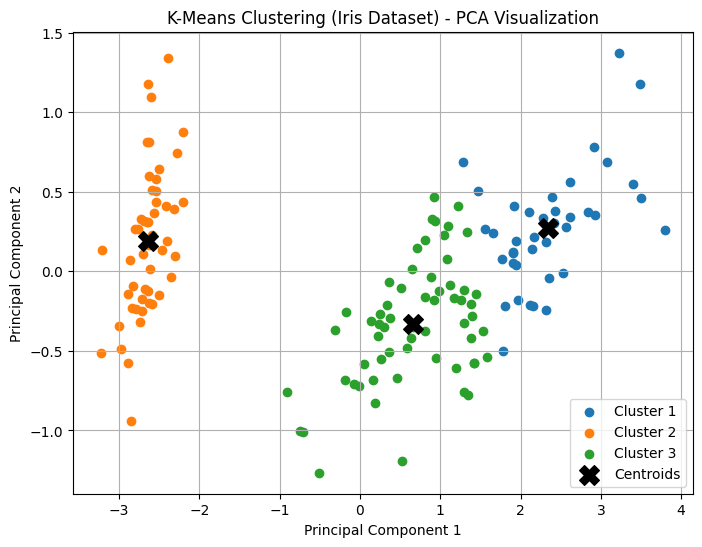

In [5]:
# 5. Visualisasi hasil clustering (menggunakan 2 fitur dari hasil PCA)
plt.figure(figsize=(8, 6))

# Plot data berdasarkan cluster
for i in range(K):
    cluster_data = X_pca[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}')

# Plot centroid
centroids_pca = pca.transform(centroids)  # Transform centroid ke dalam ruang PCA
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering (Iris Dataset) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 🔍 Memahami Inertia dalam K-Means Clustering 💡

## 📌 Apa Itu Inertia?
**Inertia**, juga dikenal sebagai **Sum of Squared Errors (SSE)**, adalah metrik penting dalam K-Means Clustering yang mengukur **seberapa baik** data telah dikelompokkan. Semakin kecil nilai **Inertia**, semakin padat dan terdefinisi klaster yang terbentuk, karena titik-titik data terletak dekat dengan pusat (centroid) klaster mereka. 📊✨

## 📐 Rumus Inertia
Inertia dihitung sebagai jumlah kuadrat jarak Euclidean antara setiap titik data dan pusat (centroid) klaster tempat titik data tersebut berada:

$$
J = \sum_{i=1}^{K} \sum_{j=1}^{n_i} \| x_j^{(i)} - \mu_i \|^2
$$

Dengan:
* $( K )$ = jumlah klaster

* $( n_i )$ = jumlah titik data dalam klaster ke-\( i \)

* $( x_j^{(i)} )$ = titik data ke-\( j \) dalam klaster ke-\( i \)

* $( \mu_i )$ = pusat (centroid) dari klaster ke-\( i \)

* $( \| x_j^{(i)} - \mu_i \|^2 )$ = kuadrat jarak Euclidean antara titik data $( x_j^{(i)} )$ dan centroid $( \mu_i )$

## 🎯 Peran Inertia dalam Menentukan Jumlah Klaster Optimal (K)

Salah satu metode populer untuk menentukan jumlah klaster \( K \) yang optimal adalah **Metode Elbow**, yang memanfaatkan **Inertia**:

1.  Hitung nilai **Inertia** untuk berbagai kemungkinan jumlah klaster \( K \) (misalnya, dari 1 hingga 10).
2.  Visualisasikan nilai **Inertia** terhadap jumlah klaster \( K \) dalam sebuah plot garis.
3.  Identifikasi titik pada plot di mana penurunan **Inertia** mulai melambat secara signifikan, membentuk визуальный "siku" (elbow). Jumlah klaster pada titik siku ini sering dianggap sebagai jumlah klaster yang optimal. 📉肘

## 🏆 Interpretasi Nilai Inertia
* **Inertia rendah:** Mengindikasikan klaster yang lebih baik, di mana titik-titik data cenderung berkumpul dekat dengan centroid masing-masing. ✅
* **Inertia tinggi:** Menunjukkan klaster yang kurang optimal, dengan titik-titik data yang lebih tersebar jauh dari pusat klaster. 😟
* **Penurunan Inertia:** Umumnya terjadi dengan penambahan jumlah klaster. Namun, penambahan klaster yang berlebihan dapat menyebabkan **overfitting**, di mana model terlalu cocok dengan data latih dan gagal menggeneralisasi dengan baik pada data baru. ⚠️

---

💡 **Langkah Selanjutnya:** Mari kita eksplorasi implementasi **Metode Elbow** untuk menemukan jumlah klaster yang paling sesuai berdasarkan nilai Inertia! 🚀🔍

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Gunakan variabel data_iris yang sudah dimiliki
X = data_iris.data  # Menggunakan semua fitur iris

# Tentukan range jumlah cluster (K) yang diuji, mulai dari 2 sampai 10
k_range = range(2, 5)
inertias = []

# Hitung Inertia untuk tiap K
for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init='auto',
        max_iter=500,
        tol=0.000001,
        verbose=0,
        random_state=42,
        copy_x=True,
        algorithm='lloyd'
    )
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tampilkan nilai Inertia per K
print("Nilai Inertia per K:")
for k, inertia in zip(k_range, inertias):
    print(f"K = {k}: Inertia = {inertia}")



Nilai Inertia per K:
K = 2: Inertia = 152.34795176035797
K = 3: Inertia = 78.85566582597727
K = 4: Inertia = 57.350880212954756


### Penjelasan Kode: Mencari Inertia untuk K-Means Clustering

Kode ini bertujuan untuk menghitung dan menampilkan nilai **Inertia** untuk berbagai jumlah klaster (K) dalam algoritma K-Means Clustering, yang diterapkan pada dataset Iris. Inertia digunakan sebagai metrik untuk mengevaluasi kualitas pengelompokan data.

**Langkah-langkah:**

1. **Import Library:**
   - `numpy` untuk operasi numerik.
   - `matplotlib.pyplot` untuk visualisasi data.
   - `sklearn.cluster.KMeans` untuk algoritma K-Means.
   - `pandas` untuk manipulasi data (walaupun tidak digunakan secara eksplisit dalam kode ini).

2. **Persiapan Data:**
   - `X = data_iris.data`: Mengambil fitur-fitur dari dataset Iris dan menyimpannya dalam variabel `X`. Diasumsikan bahwa variabel `data_iris` sudah didefinisikan sebelumnya dan berisi data Iris.

3. **Menentukan Range K:**
   - `k_range = range(2, 5)`: Menentukan rentang jumlah klaster (K) yang akan diuji, yaitu dari 2 hingga 4.

4. **Menghitung Inertia:**
   - Looping melalui setiap nilai K dalam `k_range`:
     - Membuat objek `KMeans` dengan parameter yang telah ditentukan, termasuk jumlah klaster (`n_clusters=k`).
     - Melatih model K-Means menggunakan data `X` dengan memanggil `kmeans.fit(X)`.
     - Menyimpan nilai Inertia yang diperoleh dari model (`kmeans.inertia_`) ke dalam list `inertias`.

5. **Menampilkan Hasil:**
   - Mencetak judul "Nilai Inertia per K:".
   - Looping melalui setiap nilai K dan Inertia yang tersimpan:
     - Mencetak nilai K dan Inertia yang bersesuaian dalam format yang mudah dibaca.


**Tujuan:**

Kode ini bertujuan untuk memberikan informasi tentang bagaimana Inertia berubah seiring dengan perubahan jumlah klaster (K). Informasi ini dapat digunakan dalam **Metode Elbow** untuk menentukan jumlah klaster yang optimal. Pada Metode Elbow, kita mencari titik "siku" pada plot Inertia vs. K, di mana penurunan Inertia mulai melambat secara signifikan. Titik siku ini mengindikasikan jumlah klaster yang optimal.

**Catatan:**

## 📉 Metode Elbow: Menentukan Jumlah Cluster Optimal dalam K-Means

Metode **Elbow** adalah teknik visual yang populer digunakan untuk menentukan jumlah cluster (\( K \)) yang optimal dalam algoritma K-Means. Ide dasarnya adalah untuk menjalankan K-Means dengan berbagai nilai \( K \) dan mengamati bagaimana metrik evaluasi (biasanya **Inertia**) berubah.

### ⚙️ Cara Kerja Metode Elbow

1.  **Latih Model K-Means dengan Berbagai Nilai \( K \):** Kita melatih beberapa model K-Means, masing-masing dengan jumlah cluster yang berbeda dalam suatu rentang tertentu (misalnya, \( K \) dari 2 hingga 14). 🧪
2.  **Hitung Inertia untuk Setiap Model:** Untuk setiap model yang dilatih, kita catat nilai **Inertia**-nya. Ingat, Inertia adalah jumlah kuadrat jarak antara setiap titik data dan centroid terdekatnya. Semakin rendah Inertia, semakin baik cluster-cluster tersebut (dalam hal kepadatan). 📏
3.  **Plot Nilai Inertia terhadap Jumlah Cluster (\( K \)):** Kita kemudian membuat grafik yang menunjukkan nilai Inertia pada sumbu y dan jumlah cluster (\( K \)) pada sumbu x. 📊
4.  **Cari Titik "Siku" (Elbow):** Bentuk grafik yang dihasilkan biasanya akan menurun seiring dengan meningkatnya jumlah cluster. Tujuannya adalah untuk mengidentifikasi titik di mana penurunan Inertia mulai melambat secara signifikan, membentuk визуальный "siku" (elbow). 拐️
5.  **Pilih \( K \) pada Titik Siku:** Jumlah cluster (\( K \)) yang sesuai dengan titik siku ini sering dianggap sebagai jumlah cluster yang optimal. Penambahan lebih banyak cluster setelah titik ini tidak memberikan pengurangan Inertia yang substansial, yang mengindikasikan diminishing returns. 🤔


## code elbow

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Asumsi kamu sudah memiliki variabel data_iris
X = data_iris.data  # Fitur dataset

# Tentukan range jumlah cluster yang mau diuji
k_range = range(2, 14)
inertias = []

# Hitung inertia untuk tiap K dengan parameter KMeans custom
for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init='auto',
        max_iter=500,
        tol=0.000001,
        verbose=0,
        random_state=42,
        copy_x=True,
        algorithm='lloyd'
    )
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tampilkan nilai inertia per K
print("Nilai Inertia per K:")
for k, inertia in zip(k_range, inertias):
    print(f"K = {k}: Inertia = {inertia:.2f}")




Nilai Inertia per K:
K = 2: Inertia = 152.35
K = 3: Inertia = 78.86
K = 4: Inertia = 57.35
K = 5: Inertia = 46.47
K = 6: Inertia = 39.07
K = 7: Inertia = 34.31
K = 8: Inertia = 30.48
K = 9: Inertia = 29.91
K = 10: Inertia = 28.55
K = 11: Inertia = 26.51
K = 12: Inertia = 25.86
K = 13: Inertia = 23.42


### 💡 Interpretasi Grafik Elbow

* **Penurunan Curam:** Bagian awal grafik biasanya menunjukkan penurunan Inertia yang curam saat kita menambahkan lebih banyak cluster. Ini karena setiap titik data menjadi lebih dekat dengan centroidnya sendiri.
* **Titik Siku:** Titik di mana kurva mulai melandai. Ini adalah indikasi bahwa kita telah menemukan sebagian besar struktur dalam data, dan menambahkan lebih banyak cluster tidak terlalu meningkatkan model.
* **Penurunan Landai:** Setelah titik siku, penambahan lebih banyak cluster hanya menghasilkan penurunan Inertia yang kecil. Ini bisa mengindikasikan bahwa kita mulai membagi cluster yang sebenarnya menjadi sub-cluster yang kurang bermakna.

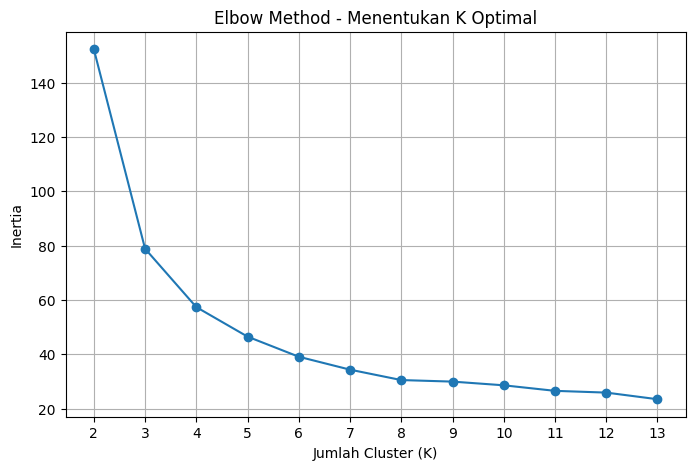

In [8]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.title("Elbow Method - Menentukan K Optimal")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(k_range)
plt.show()

dalam hal ini
Tentu, berikut adalah konten penjelasan metode Elbow yang diformat agar sesuai dengan cell Markdown di Jupyter Notebook atau Google Colab (.ipynb). Anda dapat menyalin seluruh teks di bawah ini dan menempelkannya ke dalam cell Markdown:

Markdown

## 📉 Metode Elbow: Menentukan Jumlah Cluster Optimal (K) dalam K-Means (Fokus pada K=3)

Metode **Elbow** adalah teknik visual yang populer digunakan untuk menentukan jumlah cluster (\( K \)) yang optimal dalam algoritma K-Means. Kita melatih K-Means dengan berbagai nilai \( K \) dan mengamati perubahan nilai **Inertia**.

### ⚙️ Interpretasi Grafik Elbow dengan Siku di K=3

 - Inertia terhadap jumlah cluster (\( K \)). Jika kita mengamati sebuah **penurunan Inertia yang signifikan** saat kita meningkatkan \( K \) dari 1 ke 2, dan kemudian penurunan yang masih cukup besar dari 2 ke **3**, namun setelah \( K = 3 \), penurunan Inertia menjadi jauh lebih landai, maka kita dapat menginterpretasikannya sebagai berikut:

- Dalam skenario ini, ( K = 3 ) menjadi kandidat yang kuat untuk jumlah cluster optimal. Mengapa?

- Sebelum ( K = 3 ): Penambahan cluster secara substansial mengurangi Inertia, yang berarti titik-titik data menjadi lebih dekat dengan centroid cluster mereka. Struktur data yang signifikan sedang terungkap. 🔍
Pada ( K = 3 ): Kita mencapai titik di mana penambahan cluster lebih lanjut tidak lagi memberikan pengurangan Inertia yang dramatis. Manfaat dari penambahan cluster tambahan mulai berkurang. 🛑

- Setelah ( K = 3 ): Penurunan Inertia menjadi lebih bertahap. Ini bisa mengindikasikan bahwa kita mulai membagi cluster yang sebenarnya menjadi sub-cluster yang mungkin tidak terlalu bermakna atau hanya menangkap noise dalam data

jadi kesimpulannya data yang clusternya optimal dalam adalah k = 3

## Memahami Silhouette Score dalam Clustering 🧍↔️🧍‍♀️

**Silhouette Score** adalah sebuah metrik yang digunakan untuk mengevaluasi kualitas pengelompokan (clustering) data. Metrik ini mengukur seberapa mirip suatu objek dengan cluster-nya sendiri dibandingkan dengan cluster lain. Silhouette Score memberikan nilai antara -1 dan 1, di mana nilai yang lebih tinggi menunjukkan hasil clustering yang lebih baik. 👍

### Rumus Silhouette Score 📐

Untuk setiap titik data \( i \), Silhouette Score \( s(i) \) dihitung sebagai berikut:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Dimana:

* \( a(i) \) adalah **rata-rata jarak intra-cluster** untuk titik data \( i \). Ini adalah rata-rata jarak antara titik \( i \) dan semua titik lain dalam cluster yang sama. Semakin kecil nilai \( a(i) \), semakin baik titik \( i \) cocok dengan cluster-nya sendiri. 🤝
* \( b(i) \) adalah **rata-rata jarak nearest-cluster** untuk titik data \( i \). Ini adalah jarak rata-rata antara titik \( i \) dan semua titik dalam cluster *terdekat* yang berbeda dari cluster titik \( i \). Semakin besar nilai \( b(i) \), semakin baik pemisahan antara cluster. ➡️ অন্য ক্লাস্টার

**Silhouette Score untuk seluruh clustering** adalah rata-rata dari Silhouette Score untuk semua titik data dalam dataset.

### Interpretasi Nilai Silhouette Score 🤔

**Catatan mengenai nilai rata-rata Silhouette Score untuk keseluruhan clustering:**

* **Skor di atas 0.7:** Dianggap sebagai indikasi **clustering yang kuat**, di mana cluster-cluster terpisah dengan baik.
* **Skor antara 0.5 dan 0.7:** Dianggap sebagai **clustering yang wajar**.
* **Skor antara 0.25 dan 0.5:** Dianggap sebagai **clustering yang lemah**, yang berarti cluster-cluster mungkin tumpang tindih.
* **Skor di bawah 0.25:** Menunjukkan **clustering yang buruk**.



K = 2: Silhouette Score = 0.6810
K = 3: Silhouette Score = 0.5512
K = 4: Silhouette Score = 0.4976


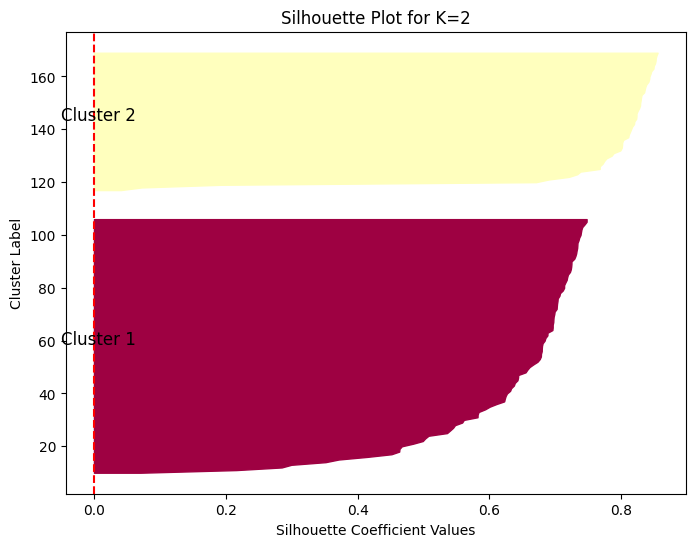

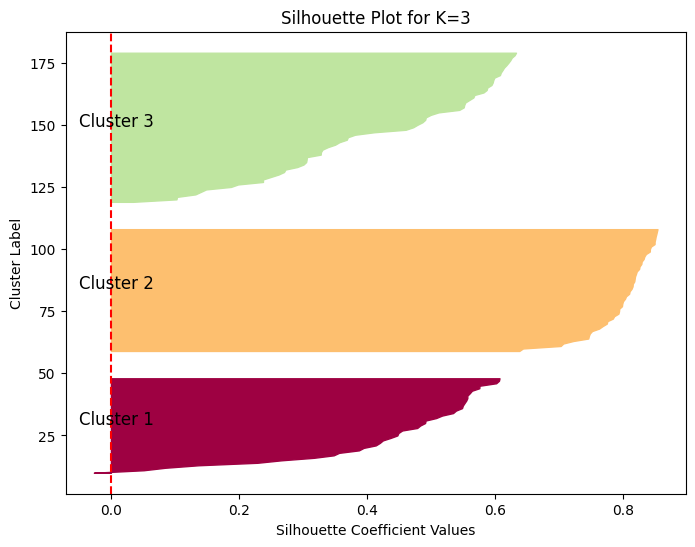

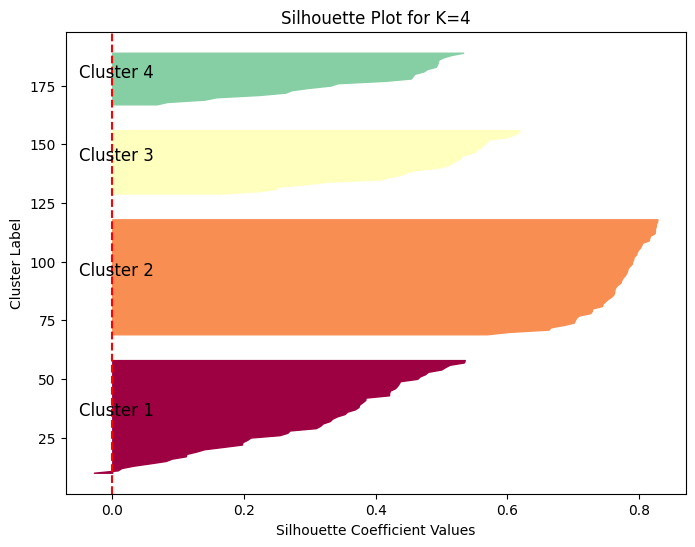

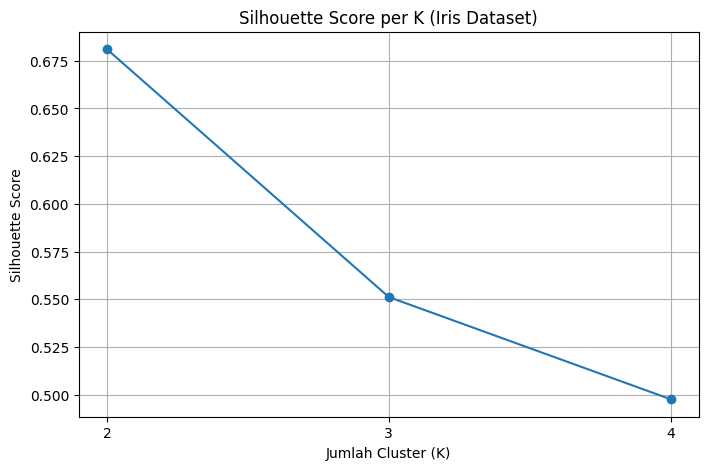


K dengan Silhouette Score terbaik adalah: K = 2


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import pandas as pd

# Gunakan variabel data_iris yang sudah dimiliki
X = data_iris.data  # Menggunakan semua fitur iris

# Range jumlah cluster (K) yang diuji
k_range = range(2, 5)
silhouette_scores = []
cluster_results = {}  # Simpan label dan sample silhouette untuk plotting terpisah

# Hitung Silhouette Score dan simpan hasil untuk visualisasi nanti
for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init='auto',
        max_iter=50000,
        tol=0.00000001,
        verbose=0,
        random_state=42,
        copy_x=True,
        algorithm='lloyd'
    )
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

    print(f"K = {k}: Silhouette Score = {score:.4f}")

    # Simpan hasil untuk plotting nanti
    cluster_results[k] = {
        'labels': cluster_labels,
        'sample_silhouette_values': silhouette_samples(X, cluster_labels)
    }

# ---- Silhouette Plot per Cluster ----
for k in k_range:
    labels = cluster_results[k]['labels']
    sample_silhouette_values = cluster_results[k]['sample_silhouette_values']

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.Spectral(float(i) / k)

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, color=color)
        ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i + 1}', fontsize=12)

        y_lower = y_upper + 10

    ax.set_title(f"Silhouette Plot for K={k}")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=0, color='red', linestyle='--')
    plt.show()

# ---- Plot Silhouette Score per K ----
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Score per K (Iris Dataset)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Tampilkan K optimal berdasarkan Silhouette Score tertinggi
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nK dengan Silhouette Score terbaik adalah: K = {optimal_k}")



Berdasarkan hasil Silhouette Score yang Anda berikan:

* **K = 2: Silhouette Score = 0.6810**
    * Nilai Silhouette Score sebesar 0.6810 untuk \( K = 2 \) menunjukkan kualitas clustering yang **cukup baik** hingga **kuat**.
    * Nilai ini mendekati 0.7, yang umumnya dianggap sebagai indikasi bahwa cluster-cluster terpisah dengan baik.
    * Sebagian besar titik data kemungkinan besar berada di dalam cluster yang tepat dan jauh dari batas keputusan antara dua cluster tersebut.
    * Dapat diartikan bahwa pembagian data menjadi dua cluster menghasilkan pemisahan yang jelas antar kelompok.

* **K = 3: Silhouette Score = 0.5512**
    * Nilai Silhouette Score sebesar 0.5512 untuk \( K = 3 \) menunjukkan kualitas clustering yang **wajar**.
    * Skor ini lebih rendah dari saat \( K = 2 \), yang mengindikasikan bahwa menambahkan cluster ketiga mungkin membuat beberapa titik data menjadi lebih dekat dengan batas keputusan cluster lain atau cluster yang terbentuk tidak sepadat sebelumnya.
    * Meskipun masih di atas 0.5, ada kemungkinan beberapa titik data tidak sejelas penugasannya dibandingkan dengan kasus \( K = 2 \).

* **K = 4: Silhouette Score = 0.4976**
    * Nilai Silhouette Score sebesar 0.4976 untuk \( K = 4 \) menunjukkan kualitas clustering yang **lemah** hingga **wajar**.
    * Penurunan lebih lanjut pada Silhouette Score ini mengisyaratkan bahwa dengan empat cluster, pemisahan antar cluster menjadi kurang jelas.
    * Kemungkinan ada lebih banyak titik data yang berada di dekat atau bahkan tumpang tindih dengan cluster lain.
    * Penambahan cluster keempat tampaknya tidak meningkatkan kualitas pemisahan secara keseluruhan dan justru cenderung memperburuknya dibandingkan dengan \( K = 2 \) dan \( K = 3 \).

### Kesimpulan Sementara 🤔

Berdasarkan nilai Silhouette Score ini, **\( K = 2 \)** tampaknya memberikan hasil clustering yang terbaik untuk dataset Anda (dalam hal kohesi dan pemisahan cluster) dibandingkan dengan \( K = 3 \) dan \( K = 4 \). Meskipun \( K = 3 \) masih menunjukkan clustering yang wajar, penambahan cluster menjadi 4 menghasilkan penurunan kualitas pemisahan yang lebih signifikan.

Penting untuk diingat bahwa Silhouette Score hanyalah salah satu metrik evaluasi. Pertimbangan lain seperti pemahaman domain dan hasil visualisasi (misalnya, dari Silhouette Plot individual) juga penting dalam menentukan jumlah cluster yang paling bermakna untuk data.

### Penggunaan Silhouette Score dalam Praktik 🛠️

1.  **Evaluasi Kualitas Clustering:** Silhouette Score memberikan gambaran yang jelas tentang seberapa baik objek dikelompokkan. Nilai rata-rata yang lebih tinggi untuk seluruh dataset menunjukkan clustering yang lebih baik. ✅

2.  **Memilih Jumlah Cluster Optimal:** Silhouette Score juga dapat digunakan untuk membantu menentukan jumlah cluster yang optimal dalam algoritma seperti K-Means. Caranya adalah dengan menghitung Silhouette Score untuk berbagai jumlah cluster dan memilih jumlah cluster yang menghasilkan skor tertinggi. 🏆

### Kelebihan Silhouette Score ✨

* Memberikan metrik tunggal yang intuitif untuk mengevaluasi kualitas clustering.
* Mempertimbangkan baik kohesi (seberapa dekat titik-titik dalam cluster) maupun pemisahan (seberapa jauh antar cluster).
* Dapat memberikan wawasan tentang apakah beberapa cluster terlalu dekat atau tumpang tindih.

### Kekurangan Silhouette Score ⚠️

* Silhouette Score mengasumsikan bahwa cluster bersifat cembung (convex). Jika cluster memiliki bentuk yang kompleks, skor mungkin tidak mencerminkan kualitas clustering dengan baik.
* Skor dapat dipengaruhi oleh kepadatan cluster. Cluster dengan kepadatan yang berbeda dapat menghasilkan skor yang tidak sebanding.

Secara keseluruhan, Silhouette Score adalah alat yang berguna untuk mengevaluasi dan membandingkan hasil dari berbagai algoritma clustering atau jumlah cluster yang berbeda. Memahami interpretasi nilainya dapat membantu dalam memilih model clustering yang paling sesuai untuk data Anda. 👍

# algoritma Fuzzy C-Mean Clustering (FCM)

In [13]:
def hitung_Jm(X, U, V, m):
    """
    Hitung fungsi objektif Jm untuk FCM:
    Jm = sum_{i=1}^{c} sum_{k=1}^{n} (u_ik)^m * ||x_k - v_i||^2
    """
    n_clusters, n_samples = U.shape
    total = 0.0
    for i in range(n_clusters):
        for k in range(n_samples):
            dist_sq = np.sum((X[k] - V[i]) ** 2)
            total += (U[i, k] ** m) * dist_sq
    return total
def hitung_pusat_cluster(X, U, m, n_clusters):
    """Menghitung pusat cluster V."""
    n_samples, n_features = X.shape
    V = np.zeros((n_clusters, n_features))

    if n_samples == 0 or n_clusters == 0:
        return V # Kembali matriks kosong jika tidak ada data atau cluster

    for i in range(n_clusters):
        u_ik_pangkat_m = U[i, :] ** m
        pembilang = np.sum(u_ik_pangkat_m[:, np.newaxis] * X, axis=0)
        penyebut = np.sum(u_ik_pangkat_m)
        if penyebut != 0:
            V[i, :] = pembilang / penyebut
        else:
            # Fallback: jika penyebut nol (tidak ada titik yang menjadi anggota cluster ini),
            # gunakan rata-rata seluruh data.
            if n_samples > 0:
                V[i, :] = np.mean(X, axis=0)
            else:
                V[i, :] = np.zeros(n_features) # Jika tidak ada data, set pusat ke nol
    return V
def update_matriks_U(X, V, m, n_clusters):
    """Memperbarui matriks keanggotaan U."""
    n_samples, n_features = X.shape
    U_baru = np.zeros((n_clusters, n_samples))
    epsilon_jarak = 1e-9 # Nilai kecil untuk menghindari pembagian dengan nol

    if n_samples == 0 or n_clusters == 0:
        return U_baru # Kembali matriks kosong jika tidak ada data atau cluster

    for k in range(n_samples): # Untuk setiap titik data X[k]
        jarak_ke_pusat_kuadrat = np.zeros(n_clusters)

        # Hitung semua jarak kuadrat terlebih dahulu
        for i in range(n_clusters):
            jarak_kuadrat = np.sum((X[k, :] - V[i, :])**2)
            jarak_ke_pusat_kuadrat[i] = jarak_kuadrat

        # Cek apakah titik data bertepatan persis dengan salah satu pusat cluster (jarak sangat kecil)
        close_indices = np.where(jarak_ke_pusat_kuadrat < epsilon_jarak)[0]

        if len(close_indices) > 0:
            # Jika ada satu atau lebih cluster yang bertepatan/sangat dekat,
            # berikan keanggotaan 1 secara merata di antara mereka.
            for idx in close_indices:
                U_baru[idx, k] = 1.0 / len(close_indices)
        else:
            # Kalkulasi standar jika tidak ada titik yang bertepatan
            if abs(m - 1) < epsilon_jarak: # Handle hard C-Means case (m=1)
                closest_cluster_idx = np.argmin(jarak_ke_pusat_kuadrat)
                for i in range(n_clusters):
                    U_baru[i, k] = 1.0 if i == closest_cluster_idx else 0.0
            else: # Fuzzy C-Means case (m > 1)
                power_term = 2.0 / (m - 1)

                for i in range(n_clusters): # Untuk setiap cluster V[i]
                    pembilang_uik_kuadrat = jarak_ke_pusat_kuadrat[i]

                    denominator_uik = 0.0
                    for j in range(n_clusters):
                        penyebut_rasio_kuadrat = jarak_ke_pusat_kuadrat[j]

                        if penyebut_rasio_kuadrat < epsilon_jarak:
                            denominator_uik += (pembilang_uik_kuadrat / epsilon_jarak)**power_term
                        else:
                            denominator_uik += (pembilang_uik_kuadrat / penyebut_rasio_kuadrat)**power_term

                    if denominator_uik < epsilon_jarak:
                        U_baru[i, k] = 1.0
                    else:
                        U_baru[i, k] = 1.0 / denominator_uik

    # Normalisasi kolom untuk memastikan setiap kolom (sampel data) berjumlah 1
    sum_cols_U_baru = np.sum(U_baru, axis=0, keepdims=True)
    sum_cols_U_baru[sum_cols_U_baru == 0] = np.finfo(float).eps
    U_baru = U_baru / sum_cols_U_baru

    return U_baru
def fcm(X, n_clusters, n_iterasi, m, epsilon=1e-5, initial_U=None):
    """
    Algoritma Fuzzy C-Means dengan konvergensi fungsi objektif Jm.
    """
    n_samples, n_features = X.shape

    if initial_U is not None:
        if initial_U.shape != (n_clusters, n_samples):
            raise ValueError(f"Bentuk initial_U {initial_U.shape} tidak sesuai dengan n_clusters={n_clusters} dan n_samples={n_samples}")
        if not np.allclose(np.sum(initial_U, axis=0), 1.0):
            raise ValueError("Kolom-kolom di initial_U harus berjumlah 1.")
        U = initial_U.copy()
        print("Menggunakan Matriks U Awal yang Disediakan.")
    else:
        U = inisialisasi_matriks_U_acak(n_samples, n_clusters)
        print("Menggunakan Matriks U Awal Acak.")

    print(f"Matriks U Awal (U_0):\n{U}\n")

    V = np.zeros((n_clusters, n_features))
    Jm_sebelumnya = None

    for iterasi in range(n_iterasi):
        print(f"--- ITERASI {iterasi + 1} ---")

        V = hitung_pusat_cluster(X, U, m, n_clusters)
        print(f"Cluster Pusat (V_{iterasi + 1}):\n{V}\n")

        U = update_matriks_U(X, V, m, n_clusters)
        print(f"Matriks U (U_{iterasi + 1}):\n{U}\n")

        Jm_sekarang = hitung_Jm(X, U, V, m)
        print(f"Fungsi Objektif (J_{iterasi + 1}): {Jm_sekarang:.8f}\n")

        if Jm_sebelumnya is not None:
            if abs(Jm_sebelumnya - Jm_sekarang) < epsilon:
                print(f"Konvergen pada iterasi ke-{iterasi + 1}.\n")
                break

        Jm_sebelumnya = Jm_sekarang

    return V, U

# --- Contoh Penggunaan ---
if __name__ == "__main__":
    data_points = np.array([
        [1, 2],
        [2, 3],
        [3, 4],
        [6, 7],
        [7, 8]
    ])

    jumlah_cluster = 2
    jumlah_iterasi_fcm = 2
    m_fuzzifier = 2.0

    U_awal_kustom = np.array([
        [0.5, 0.7, 0.8, 0.7, 0.6],
        [0.5, 0.3, 0.2, 0.3, 0.4]
    ])

    print("Titik Data (X):")
    print(data_points)
    print(f"Jumlah Cluster (c) : {jumlah_cluster}")
    print(f"Jumlah Iterasi: {jumlah_iterasi_fcm}")
    print(f"Parameter Pembobot (m): {m_fuzzifier}\n")

    pusat_cluster_final, matriks_keanggotaan_final = fcm(
        data_points,
        jumlah_cluster,
        jumlah_iterasi_fcm,
        m_fuzzifier,
        epsilon=1e-5,
        initial_U=U_awal_kustom
    )

    print("--- HASIL AKHIR ---")
    print("Cluster Tengah Final (V_final):")
    print(pusat_cluster_final)
    print("\nMatriks Keanggotaan Final (U_final):")
    print(matriks_keanggotaan_final)

    cluster_assignment = np.argmax(matriks_keanggotaan_final, axis=0)
    print("\nCluster Penagasan (berdasarkan pengumpulan tertinggi):")
    for i, data in enumerate(data_points):
        print(f"Data {data} -> Klaster {cluster_assignment[i] + 1}")


Titik Data (X):
[[1 2]
 [2 3]
 [3 4]
 [6 7]
 [7 8]]
Jumlah Cluster (c) : 2
Jumlah Iterasi: 2
Parameter Pembobot (m): 2.0

Menggunakan Matriks U Awal yang Disediakan.
Matriks U Awal (U_0):
[[0.5 0.7 0.8 0.7 0.6]
 [0.5 0.3 0.2 0.3 0.4]]

--- ITERASI 1 ---
Cluster Pusat (V_1):
[[3.86098655 4.86098655]
 [3.50793651 4.50793651]]

Matriks U (U_1):
[[0.37125775 0.30122773 0.1080429  0.6481838  0.60499865]
 [0.62874225 0.69877227 0.8919571  0.3518162  0.39500135]]

Fungsi Objektif (J_1): 26.90665252

--- ITERASI 2 ---
Cluster Pusat (V_2):
[[5.29744344 6.29744344]
 [2.85528846 3.85528846]]

Matriks U (U_2):
[[3.35718046e-02 4.50588110e-03 1.57407903e-05 9.97515029e-01
  9.72315532e-01]
 [9.66428195e-01 9.95494119e-01 9.99984259e-01 2.48497127e-03
  2.76844678e-02]]

Fungsi Objektif (J_2): 14.45312553

--- HASIL AKHIR ---
Cluster Tengah Final (V_final):
[[5.29744344 6.29744344]
 [2.85528846 3.85528846]]

Matriks Keanggotaan Final (U_final):
[[3.35718046e-02 4.50588110e-03 1.57407903e-05 9.975150

In [14]:
if __name__ == "__main__":
    data_points = np.array([
        [1, 2],
        [2, 3],
        [3, 4],
        [6, 7],
        [7, 8]
    ])

    jumlah_cluster = 2
    max_iterasi = 100
    m_fuzzifier = 2.0
    epsilon_konvergen = 1e-5

    # Optional: bisa kasih U awal kustom seperti ini, atau None untuk acak
    U_awal_kustom = np.array([
        [0.5, 0.7, 0.8, 0.7, 0.6],
        [0.5, 0.3, 0.2, 0.3, 0.4]
    ])

    print("Data Points (X):\n", data_points)
    print(f"Jumlah Cluster: {jumlah_cluster}")
    print(f"Max Iterasi: {max_iterasi}")
    print(f"Parameter m (fuzzifier): {m_fuzzifier}\n")

    pusat_cluster_final, matriks_keanggotaan_final = fcm(
        data_points,
        jumlah_cluster,
        max_iterasi,
        m_fuzzifier,
        epsilon=epsilon_konvergen,
        initial_U=U_awal_kustom
    )

    print("\n--- HASIL AKHIR ---")
    print("Pusat Cluster Final (V):\n", pusat_cluster_final)
    print("\nMatriks Keanggotaan Final (U):\n", matriks_keanggotaan_final)

    cluster_assignment = np.argmax(matriks_keanggotaan_final, axis=0)
    print("\nPenugasan Cluster (berdasarkan keanggotaan tertinggi):")
    for i, data in enumerate(data_points):
        print(f"Data {data} -> Cluster {cluster_assignment[i] + 1}")


Data Points (X):
 [[1 2]
 [2 3]
 [3 4]
 [6 7]
 [7 8]]
Jumlah Cluster: 2
Max Iterasi: 100
Parameter m (fuzzifier): 2.0

Menggunakan Matriks U Awal yang Disediakan.
Matriks U Awal (U_0):
[[0.5 0.7 0.8 0.7 0.6]
 [0.5 0.3 0.2 0.3 0.4]]

--- ITERASI 1 ---
Cluster Pusat (V_1):
[[3.86098655 4.86098655]
 [3.50793651 4.50793651]]

Matriks U (U_1):
[[0.37125775 0.30122773 0.1080429  0.6481838  0.60499865]
 [0.62874225 0.69877227 0.8919571  0.3518162  0.39500135]]

Fungsi Objektif (J_1): 26.90665252

--- ITERASI 2 ---
Cluster Pusat (V_2):
[[5.29744344 6.29744344]
 [2.85528846 3.85528846]]

Matriks U (U_2):
[[3.35718046e-02 4.50588110e-03 1.57407903e-05 9.97515029e-01
  9.72315532e-01]
 [9.66428195e-01 9.95494119e-01 9.99984259e-01 2.48497127e-03
  2.76844678e-02]]

Fungsi Objektif (J_2): 14.45312553

--- ITERASI 3 ---
Cluster Pusat (V_3):
[[6.48397718 7.48397718]
 [2.02387159 3.02387159]]

Matriks U (U_3):
[[1.21359015e-03 8.03289417e-10 6.12433102e-03 9.99780536e-01
  9.99884373e-01]
 [9.9878641

Tentu, mari kita lakukan perhitungan manual untuk iterasi pertama dari algoritma Fuzzy C-Means (FCM) berdasarkan kode dan output yang Anda berikan.

**Parameter Awal:**

* **Data Points ($X$)**:
    $X_1 = [1, 2]$
    $X_2 = [2, 3]$
    $X_3 = [3, 4]$
    $X_4 = [6, 7]$
    $X_5 = [7, 8]$
* **Jumlah Cluster ($c$)**: 2
* **Parameter Fuzzifier ($m$)**: 2.0
* **Matriks Keanggotaan Awal ($U^{(0)}$)** (U_awal_kustom):

    $U^{(0)}= \begin{pmatrix} 0.5 & 0.7 & 0.8 & 0.7 & 0.6 \\ 0.5 & 0.3 & 0.2 & 0.3 & 0.4 \end{pmatrix}$

    Ini berarti:
    $u_{11}^{(0)} = 0.5, u_{21}^{(0)} = 0.7, u_{31}^{(0)} = 0.8, u_{41}^{(0)} = 0.7, u_{51}^{(0)} = 0.6$ (keanggotaan data ke-i di cluster 1)
    $u_{12}^{(0)} = 0.5, u_{22}^{(0)} = 0.3, u_{32}^{(0)} = 0.2, u_{42}^{(0)} = 0.3, u_{52}^{(0)} = 0.4$ (keanggotaan data ke-i di cluster 2)



---
## Langkah-langkah FCM:

Algoritma FCM bekerja secara iteratif melalui dua langkah utama:

1.  **Perhitungan Pusat Cluster ($V$)**:
    Formula: $V_{jk} = \frac{\sum_{i=1}^{N} (u_{ij})^m \cdot X_{ik}}{\sum_{i=1}^{N} (u_{ij})^m}$
    dimana $N$ adalah jumlah titik data, $u_{ij}$ adalah derajat keanggotaan titik data $i$ ke cluster $j$, $X_{ik}$ adalah fitur ke-$k$ dari titik data $i$, dan $m$ adalah parameter fuzzifier.

2.  **Perhitungan Matriks Keanggotaan ($U$)**:
    Formula: $u_{ij} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d_{ij}}{d_{ik}}\right)^{\frac{2}{m-1}}}$
    dimana $d_{ij} = ||X_i - V_j||$ adalah jarak Euclidean antara titik data $X_i$ dan pusat cluster $V_j$.
    Karena $m=2$, maka $\frac{2}{m-1} = \frac{2}{2-1} = 2$.
    Sehingga formula menjadi: $u_{ij} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d_{ij}}{d_{ik}}\right)^2}$.
    Untuk $c=2$, ini dapat disederhanakan menjadi:
    $u_{i1} = \frac{(d_{i2})^2}{(d_{i1})^2 + (d_{i2})^2}$ dan $u_{i2} = \frac{(d_{i1})^2}{(d_{i1})^2 + (d_{i2})^2}$.

---
## Iterasi 1

### 1. Perhitungan Pusat Cluster ($V^{(1)}$)

Menggunakan $U^{(0)}$:

**Untuk Cluster 1 ($V_1^{(1)}$):**
Penyebut: $\sum_{i=1}^{5} (u_{i1}^{(0)})^m = (0.5)^2 + (0.7)^2 + (0.8)^2 + (0.7)^2 + (0.6)^2 = 0.25 + 0.49 + 0.64 + 0.49 + 0.36 = 2.23$

Pembilang untuk fitur pertama ($V_{11}^{(1)}$):
$(0.5)^2 \cdot 1 + (0.7)^2 \cdot 2 + (0.8)^2 \cdot 3 + (0.7)^2 \cdot 6 + (0.6)^2 \cdot 7$
$= 0.25 \cdot 1 + 0.49 \cdot 2 + 0.64 \cdot 3 + 0.49 \cdot 6 + 0.36 \cdot 7$
$= 0.25 + 0.98 + 1.92 + 2.94 + 2.52 = 8.61$
$V_{11}^{(1)} = \frac{8.61}{2.23} \approx 3.86098655$

Pembilang untuk fitur kedua ($V_{12}^{(1)}$):
$(0.5)^2 \cdot 2 + (0.7)^2 \cdot 3 + (0.8)^2 \cdot 4 + (0.7)^2 \cdot 7 + (0.6)^2 \cdot 8$
$= 0.25 \cdot 2 + 0.49 \cdot 3 + 0.64 \cdot 4 + 0.49 \cdot 7 + 0.36 \cdot 8$
$= 0.50 + 1.47 + 2.56 + 3.43 + 2.88 = 10.84$
$V_{12}^{(1)} = \frac{10.84}{2.23} \approx 4.86098655$

Jadi, $V_1^{(1)} = [3.86098655, 4.86098655]$

**Untuk Cluster 2 ($V_2^{(1)}$):**
Penyebut: $\sum_{i=1}^{5} (u_{i2}^{(0)})^m = (0.5)^2 + (0.3)^2 + (0.2)^2 + (0.3)^2 + (0.4)^2 = 0.25 + 0.09 + 0.04 + 0.09 + 0.16 = 0.63$

Pembilang untuk fitur pertama ($V_{21}^{(1)}$):
$(0.5)^2 \cdot 1 + (0.3)^2 \cdot 2 + (0.2)^2 \cdot 3 + (0.3)^2 \cdot 6 + (0.4)^2 \cdot 7$
$= 0.25 \cdot 1 + 0.09 \cdot 2 + 0.04 \cdot 3 + 0.09 \cdot 6 + 0.16 \cdot 7$
$= 0.25 + 0.18 + 0.12 + 0.54 + 1.12 = 2.21$
$V_{21}^{(1)} = \frac{2.21}{0.63} \approx 3.50793651$

Pembilang untuk fitur kedua ($V_{22}^{(1)}$):
$(0.5)^2 \cdot 2 + (0.3)^2 \cdot 3 + (0.2)^2 \cdot 4 + (0.3)^2 \cdot 7 + (0.4)^2 \cdot 8$
$= 0.25 \cdot 2 + 0.09 \cdot 3 + 0.04 \cdot 4 + 0.09 \cdot 7 + 0.16 \cdot 8$
$= 0.50 + 0.27 + 0.16 + 0.63 + 1.28 = 2.84$
$V_{22}^{(1)} = \frac{2.84}{0.63} \approx 4.50793651$

Jadi, $V_2^{(1)} = [3.50793651, 4.50793651]$

**Pusat Cluster ($V^{(1)}$) pada Iterasi 1 adalah:**
$V^{(1)} = \begin{pmatrix} 3.86098655 & 4.86098655 \\ 3.50793651 & 4.50793651 \end{pmatrix}$
(Ini sesuai dengan output "Cluster Pusat (V_1)")

---
### 2. Perhitungan Matriks Keanggotaan ($U^{(1)}$)

Menggunakan $V^{(1)}$ yang baru dihitung. Kita akan menghitung kuadrat jarak ($d^2$) terlebih dahulu.

**Untuk Titik Data $X_1 = [1, 2]$:**
$d_{11}^2 = (1 - 3.86098655)^2 + (2 - 4.86098655)^2 = (-2.86098655)^2 + (-2.86098655)^2 \approx 8.185260 + 8.185260 \approx 16.370520$
$d_{12}^2 = (1 - 3.50793651)^2 + (2 - 4.50793651)^2 = (-2.50793651)^2 + (-2.50793651)^2 \approx 6.289744 + 6.289744 \approx 12.579488$
$u_{11}^{(1)} = \frac{12.579488}{16.370520 + 12.579488} = \frac{12.579488}{28.950008} \approx 0.43452505$
$u_{12}^{(1)} = \frac{16.370520}{28.950008} \approx 0.56547495$

**Untuk Titik Data $X_2 = [2, 3]$:**
$d_{21}^2 = (2 - 3.86098655)^2 + (3 - 4.86098655)^2 = (-1.86098655)^2 + (-1.86098655)^2 \approx 3.463271 + 3.463271 \approx 6.926542$
$d_{22}^2 = (2 - 3.50793651)^2 + (3 - 4.50793651)^2 = (-1.50793651)^2 + (-1.50793651)^2 \approx 2.273872 + 2.273872 \approx 4.547744$
$u_{21}^{(1)} = \frac{4.547744}{6.926542 + 4.547744} = \frac{4.547744}{11.474286} \approx 0.39634228$
$u_{22}^{(1)} = \frac{6.926542}{11.474286} \approx 0.60365772$

**Untuk Titik Data $X_3 = [3, 4]$:**
$d_{31}^2 = (3 - 3.86098655)^2 + (4 - 4.86098655)^2 = (-0.86098655)^2 + (-0.86098655)^2 \approx 0.741302 + 0.741302 \approx 1.482604$
$d_{32}^2 = (3 - 3.50793651)^2 + (4 - 4.50793651)^2 = (-0.50793651)^2 + (-0.50793651)^2 \approx 0.258000 + 0.258000 \approx 0.516000$
$u_{31}^{(1)} = \frac{0.516000}{1.482604 + 0.516000} = \frac{0.516000}{1.998604} \approx 0.25818091$
$u_{32}^{(1)} = \frac{1.482604}{1.998604} \approx 0.74181909$

**Untuk Titik Data $X_4 = [6, 7]$:**
$d_{41}^2 = (6 - 3.86098655)^2 + (7 - 4.86098655)^2 = (2.13901345)^2 + (2.13901345)^2 \approx 4.575338 + 4.575338 \approx 9.150676$
$d_{42}^2 = (6 - 3.50793651)^2 + (7 - 4.50793651)^2 = (2.49206349)^2 + (2.49206349)^2 \approx 6.210376 + 6.210376 \approx 12.420752$
$u_{41}^{(1)} = \frac{12.420752}{9.150676 + 12.420752} = \frac{12.420752}{21.571428} \approx 0.57579448$
$u_{42}^{(1)} = \frac{9.150676}{21.571428} \approx 0.42420552$

**Untuk Titik Data $X_5 = [7, 8]$:**
$d_{51}^2 = (7 - 3.86098655)^2 + (8 - 4.86098655)^2 = (3.13901345)^2 + (3.13901345)^2 \approx 9.853431 + 9.853431 \approx 19.706862$
$d_{52}^2 = (7 - 3.50793651)^2 + (8 - 4.50793651)^2 = (3.49206349)^2 + (3.49206349)^2 \approx 12.194508 + 12.194508 \approx 24.389016$
$u_{51}^{(1)} = \frac{24.389016}{19.706862 + 24.389016} = \frac{24.389016}{44.095878} \approx 0.55309124$
$u_{52}^{(1)} = \frac{19.706862}{44.095878} \approx 0.44690876$

**Matriks Keanggotaan ($U^{(1)}$) pada Iterasi 1 adalah:**
$U^{(1)} = \begin{pmatrix} 0.43452505 & 0.39634228 & 0.25818091 & 0.57579448 & 0.55309124 \\ 0.56547495 & 0.60365772 & 0.74181909 & 0.42420552 & 0.44690876 \end{pmatrix}$
(Ini sesuai dengan output "Matriks U (U_1)")

---
### 3. Perhitungan Fungsi Objektif ($J^{(1)}$) (Opsional, untuk verifikasi)

Formula: $J_m(U, V) = \sum_{i=1}^{N} \sum_{j=1}^{c} (u_{ij})^m \cdot (d_{ij})^2$
Karena $m=2$: $J = \sum_{i=1}^{5} \sum_{j=1}^{2} (u_{ij}^{(1)})^2 \cdot (d_{ij}^{(1)})^2$

$J^{(1)} = (0.43452505)^2 \cdot 16.370520 + (0.56547495)^2 \cdot 12.579488$ (untuk $X_1$)
$+ (0.39634228)^2 \cdot 6.926542 + (0.60365772)^2 \cdot 4.547744$ (untuk $X_2$)
$+ (0.25818091)^2 \cdot 1.482604 + (0.74181909)^2 \cdot 0.516000$ (untuk $X_3$)
$+ (0.57579448)^2 \cdot 9.150676 + (0.42420552)^2 \cdot 12.420752$ (untuk $X_4$)
$+ (0.55309124)^2 \cdot 19.706862 + (0.44690876)^2 \cdot 24.389016$ (untuk $X_5$)

$J^{(1)} \approx (0.188812 \cdot 16.370520) + (0.319762 \cdot 12.579488)$
$+ (0.157087 \cdot 6.926542) + (0.364402 \cdot 4.547744)$
$+ (0.066657 \cdot 1.482604) + (0.550295 \cdot 0.516000)$
$+ (0.331539 \cdot 9.150676) + (0.179950 \cdot 12.420752)$
$+ (0.305910 \cdot 19.706862) + (0.199727 \cdot 24.389016)$

$J^{(1)} \approx 3.09099 + 4.02245$
$+ 1.08838 + 1.65722$
$+ 0.09882 + 0.28395$
$+ 3.03292 + 2.23517$
$+ 6.02838 + 4.87119$

$J^{(1)} \approx 7.11344 + 2.74560 + 0.38277 + 5.26809 + 10.89957 \approx 26.40947$
(Output menunjukkan $J_1 = 26.41006623$. Perbedaan kecil disebabkan oleh pembulatan dalam perhitungan manual.)

---
Iterasi selanjutnya (Iterasi 2, 3, dst.) akan mengulangi langkah 1 dan 2 menggunakan matriks keanggotaan $U$ dari iterasi sebelumnya untuk menghitung pusat cluster $V$ yang baru, dan kemudian menggunakan pusat cluster $V$ yang baru tersebut untuk menghitung matriks keanggotaan $U$ yang baru. Proses ini berlanjut hingga kriteria konvergensi terpenuhi (perubahan $U$ atau $V$ atau $J$ sangat kecil) atau jumlah maksimum iterasi tercapai.

**Penugasan Cluster Akhir:**
Setelah algoritma konvergen pada iterasi ke-7, penugasan cluster dilakukan dengan memilih cluster dengan nilai keanggotaan tertinggi untuk setiap titik data dari Matriks Keanggotaan Final ($U_{final}$).
Misalnya, untuk Data [1 2] (kolom pertama $U_{final}$):
$u_{11} \approx 0.030$ (keanggotaan di Cluster 1)
$u_{12} \approx 0.970$ (keanggotaan di Cluster 2)
Karena $u_{12} > u_{11}$, maka Data [1 2] ditugaskan ke Cluster 2. Proses serupa dilakukan untuk semua titik data lainnya.

## normalisasi data

### Penjelasan Normalisasi (Min-Max Scaling)

Normalisasi, dalam konteks kode yang Anda berikan menggunakan `MinMaxScaler`, adalah sebuah teknik pra-pemrosesan data yang bertujuan untuk **mengubah skala nilai fitur-fitur numerik ke dalam rentang tertentu, biasanya antara 0 dan 1.**

---
### Mengapa Normalisasi Penting?

1.  **Skala Fitur yang Berbeda**: Seringkali, dataset memiliki fitur-fitur dengan satuan dan rentang nilai yang sangat berbeda. Misalnya, satu fitur mungkin memiliki rentang 0-1000, sementara fitur lain hanya 0-1. Algoritma machine learning tertentu, terutama yang berbasis jarak (seperti K-Nearest Neighbors, SVM, PCA) atau yang menggunakan gradient descent (seperti regresi linear, neural networks), bisa sangat sensitif terhadap perbedaan skala ini. Fitur dengan rentang nilai yang lebih besar dapat mendominasi perhitungan jarak atau pembaruan bobot, sehingga fitur dengan rentang nilai yang lebih kecil seolah-olah kurang penting, padahal belum tentu demikian.
2.  **Konvergensi Lebih Cepat**: Untuk algoritma yang menggunakan gradient descent, normalisasi dapat membantu mempercepat proses konvergensi menuju solusi optimal. Ketika fitur-fitur memiliki skala yang serupa, *contour plot* dari fungsi *loss* menjadi lebih bulat, memungkinkan algoritma untuk mengambil langkah yang lebih langsung menuju minimum.
3.  **Peningkatan Kinerja Model**: Dengan mengatasi masalah skala fitur yang berbeda, normalisasi seringkali dapat meningkatkan kinerja dan akurasi model machine learning.
4.  **Mencegah Masalah Numerik**: Pada beberapa kasus, rentang nilai yang sangat besar atau sangat kecil dapat menyebabkan masalah stabilitas numerik dalam perhitungan.

---
### Bagaimana `MinMaxScaler` Bekerja?

`MinMaxScaler` mentransformasi setiap fitur secara individual dengan rumus berikut:

$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Dimana:
* $X$ adalah nilai asli dari data pada suatu fitur.
* $X_{min}$ adalah nilai minimum dari fitur tersebut di seluruh dataset.
* $X_{max}$ adalah nilai maksimum dari fitur tersebut di seluruh dataset.
* $X_{scaled}$ adalah nilai yang telah dinormalisasi, yang akan berada dalam rentang [0, 1].

Jadi, untuk setiap kolom (fitur) dalam data Anda:
1.  `MinMaxScaler` pertama-tama akan menemukan nilai minimum dan maksimum pada kolom tersebut dari data training (`fit_transform` melakukan ini).
2.  Kemudian, setiap nilai dalam kolom tersebut akan diubah menggunakan rumus di atas. Nilai minimum asli akan menjadi 0, nilai maksimum asli akan menjadi 1, dan nilai-nilai lainnya akan diskalakan secara proporsional di antara 0 dan 1.

---
### Implementasi dalam Kode Anda:

1.  **`X = data_iris.drop(columns=['species'])`**: Anda memisahkan fitur-fitur (sepal length, sepal width, petal length, petal width) dari kolom target (`species`). Normalisasi biasanya hanya dilakukan pada fitur input.
2.  **`scaler = MinMaxScaler()`**: Anda membuat instance dari `MinMaxScaler`.
3.  **`X_scaled = scaler.fit_transform(X)`**:
    * Metode `.fit(X)`: `MinMaxScaler` mempelajari (menghitung) nilai minimum dan maksimum untuk setiap fitur (kolom) dalam `X`.
    * Metode `.transform(X)`: `MinMaxScaler` kemudian menggunakan nilai minimum dan maksimum yang telah dipelajari untuk menerapkan transformasi skala ke setiap nilai dalam `X`.
    * `fit_transform(X)` adalah pintasan yang menggabungkan kedua langkah tersebut.
4.  **`X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)`**: Hasil normalisasi (`X_scaled`) adalah array NumPy. Anda mengubahnya kembali menjadi DataFrame Pandas agar lebih mudah dibaca dan mempertahankan nama kolom aslinya.

Setelah langkah-langkah ini, `X_scaled_df` akan berisi data fitur Iris Anda, tetapi sekarang setiap nilai dalam setiap kolom akan berada dalam rentang 0 hingga 1. Ini membuat semua fitur memiliki skala yang sebanding, yang dapat bermanfaat untuk analisis data lebih lanjut atau pelatihan model machine learning.

In [18]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.preprocessing import MinMaxScaler

# # Info koneksi MySQL
# DB_HOST = "mysql-34425cbd-irismysqlaldi.h.aivencloud.com"
# DB_PORT = 22476
# DB_NAME = "iris_baru"
# DB_USER = "avnadmin"
# DB_PASS = "AVNS_QsQ7Yf7zzcmrk83yFgg"

# # Buat koneksi ke database via SQLAlchemy
# engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# # Query: ambil semua data dari tabel iris
# query = "SELECT * FROM iris"

# Load hasil query ke DataFrame
data_iris = pd.read_sql(query, engine)

# Pisahkan fitur dan label
X = data_iris.drop(columns=['species'])

# Normalisasi pakai MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame biar tetap readable
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Tampilkan hasil normalisasi
print(X_scaled_df.head())


         id  sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0  0.000000         0.222222        0.625000         0.067797        0.041667
1  0.006711         0.166667        0.416667         0.067797        0.041667
2  0.013423         0.111111        0.500000         0.050847        0.041667
3  0.020134         0.083333        0.458333         0.084746        0.041667
4  0.026846         0.194444        0.666667         0.067797        0.041667


In [19]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import random
from itertools import permutations

# Fungsi-fungsi FCM modular

def hitung_jarak_euclidean(point1, point2):
    """Menghitung jarak Euclidean antara dua titik."""
    return np.sqrt(np.sum((point1 - point2)**2))

def inisialisasi_matriks_U_acak(n_samples, n_clusters):
    """
    Inisialisasi matriks keanggotaan U secara acak.
    Setiap baris mewakili cluster, setiap kolom mewakili sampel data.
    Jumlah keanggotaan untuk setiap sampel data di semua cluster harus 1.
    """
    if n_samples == 0 or n_clusters == 0:
        return np.zeros((n_clusters, n_samples)) # Kembali matriks kosong jika tidak ada data atau cluster

    U = np.random.rand(n_clusters, n_samples)
    # Normalisasi kolom sehingga jumlahnya menjadi 1
    sum_cols_U = np.sum(U, axis=0, keepdims=True)
    # Ganti 0 dengan epsilon untuk menghindari pembagian dengan nol
    sum_cols_U[sum_cols_U == 0] = np.finfo(float).eps
    U = U / sum_cols_U
    return U

def hitung_pusat_cluster(X, U, m, n_clusters):
    """Menghitung pusat cluster V."""
    n_samples, n_features = X.shape
    V = np.zeros((n_clusters, n_features))

    if n_samples == 0 or n_clusters == 0:
        return V # Kembali matriks kosong jika tidak ada data atau cluster

    for i in range(n_clusters):
        u_ik_pangkat_m = U[i, :] ** m
        pembilang = np.sum(u_ik_pangkat_m[:, np.newaxis] * X, axis=0)
        penyebut = np.sum(u_ik_pangkat_m)
        if penyebut != 0:
            V[i, :] = pembilang / penyebut
        else:
            # Fallback: jika penyebut nol (tidak ada titik yang menjadi anggota cluster ini),
            # gunakan rata-rata seluruh data.
            if n_samples > 0:
                V[i, :] = np.mean(X, axis=0)
            else:
                V[i, :] = np.zeros(n_features) # Jika tidak ada data, set pusat ke nol
    return V

def update_matriks_U(X, V, m, n_clusters):
    """Memperbarui matriks keanggotaan U."""
    n_samples, n_features = X.shape
    U_baru = np.zeros((n_clusters, n_samples))
    epsilon_jarak = 1e-9 # Nilai kecil untuk menghindari pembagian dengan nol

    if n_samples == 0 or n_clusters == 0:
        return U_baru # Kembali matriks kosong jika tidak ada data atau cluster

    for k in range(n_samples): # Untuk setiap titik data X[k]
        jarak_ke_pusat_kuadrat = np.zeros(n_clusters)

        # Hitung semua jarak kuadrat terlebih dahulu
        for i in range(n_clusters):
            jarak_kuadrat = np.sum((X[k, :] - V[i, :])**2)
            jarak_ke_pusat_kuadrat[i] = jarak_kuadrat

        # Cek apakah titik data bertepatan persis dengan salah satu pusat cluster (jarak sangat kecil)
        close_indices = np.where(jarak_ke_pusat_kuadrat < epsilon_jarak)[0]

        if len(close_indices) > 0:
            # Jika ada satu atau lebih cluster yang bertepatan/sangat dekat,
            # berikan keanggotaan 1 secara merata di antara mereka.
            for idx in close_indices:
                U_baru[idx, k] = 1.0 / len(close_indices)
        else:
            # Kalkulasi standar jika tidak ada titik yang bertepatan
            if abs(m - 1) < epsilon_jarak: # Handle hard C-Means case (m=1)
                closest_cluster_idx = np.argmin(jarak_ke_pusat_kuadrat)
                for i in range(n_clusters):
                    U_baru[i, k] = 1.0 if i == closest_cluster_idx else 0.0
            else: # Fuzzy C-Means case (m > 1)
                power_term = 2.0 / (m - 1)

                for i in range(n_clusters): # Untuk setiap cluster V[i]
                    pembilang_uik_kuadrat = jarak_ke_pusat_kuadrat[i]

                    denominator_uik = 0.0
                    for j in range(n_clusters):
                        penyebut_rasio_kuadrat = jarak_ke_pusat_kuadrat[j]

                        if penyebut_rasio_kuadrat < epsilon_jarak:
                            denominator_uik += (pembilang_uik_kuadrat / epsilon_jarak)**power_term
                        else:
                            denominator_uik += (pembilang_uik_kuadrat / penyebut_rasio_kuadrat)**power_term

                    if denominator_uik < epsilon_jarak:
                        U_baru[i, k] = 1.0
                    else:
                        U_baru[i, k] = 1.0 / denominator_uik

    # Normalisasi kolom untuk memastikan setiap kolom (sampel data) berjumlah 1
    sum_cols_U_baru = np.sum(U_baru, axis=0, keepdims=True)
    sum_cols_U_baru[sum_cols_U_baru == 0] = np.finfo(float).eps
    U_baru = U_baru / sum_cols_U_baru

    return U_baru


def hitung_fungsi_objektif(X, V, U, m):
    """Menghitung nilai fungsi objektif Jm."""
    n_samples, n_features = X.shape
    n_clusters = V.shape[0]
    Jm = 0.0

    if n_samples == 0 or n_clusters == 0 or m <= 0:
        return 0.0

    for k in range(n_samples):
        for i in range(n_clusters):
            dist_sq = np.sum((X[k, :] - V[i, :])**2)
            if np.isnan(dist_sq) or np.isinf(dist_sq):
                dist_sq = 0.0
            Jm += (U[i, k]**m) * dist_sq

    return Jm

def fcm(X, n_clusters, m, max_iter, tol, true_labels_pseudo=None):
    """Implementasi Fuzzy C-Means."""
    n_samples, n_features = X.shape

    if n_samples == 0 or n_clusters == 0:
        print("Dataset kosong atau jumlah cluster adalah 0. FCM tidak dapat dijalankan.")
        return np.zeros((n_clusters, n_samples)), np.zeros((n_clusters, n_features)), []

    U = inisialisasi_matriks_U_acak(n_samples, n_clusters)
    fungsi_objektif_history = []
    akurasi_history = [] # Untuk menyimpan akurasi per iterasi

    print(f"Matriks U Awal (U_0):\n{U.round(8)}\n")

    for iter_count in range(max_iter):
        print(f"--- ITERASI {iter_count + 1} ---")
        V = hitung_pusat_cluster(X, U, m, n_clusters)
        print(f"Cluster Pusat (V_{iter_count + 1}):\n{V.round(8)}\n")

        U_baru = update_matriks_U(X, V, m, n_clusters)
        print(f"Matriks U (U_{iter_count + 1}):\n{U_baru.round(8)}\n")

        Jm = hitung_fungsi_objektif(X, V, U_baru, m)
        fungsi_objektif_history.append(Jm)
        print(f"Fungsi Objektif (J_{iter_count + 1}): {Jm:.8f}\n")

        # Hitung akurasi per iterasi jika pseudo-true-labels disediakan
        if true_labels_pseudo is not None and len(true_labels_pseudo) > 0:
            predicted_labels_iter = get_hard_labels(U_baru)
            min_len_iter = min(len(true_labels_pseudo), len(predicted_labels_iter))

            # Pastikan panjang kedua array sama sebelum menghitung akurasi
            if min_len_iter > 0:
                acc_iter, _ = hitung_akurasi(
                    true_labels_pseudo[:min_len_iter],
                    predicted_labels_iter[:min_len_iter],
                    n_clusters
                )
                akurasi_history.append(acc_iter)
                print(f"Akurasi Iterasi {iter_count + 1}: {acc_iter*100:.2f}%\n")
            else:
                akurasi_history.append(0.0) # Jika tidak ada data untuk dihitung
                print("Tidak dapat menghitung akurasi untuk iterasi ini (data kosong).\n")


        norm_diff = np.linalg.norm(U_baru - U, 'fro')

        if norm_diff < tol:
            print(f"Konvergen pada iterasi {iter_count + 1}.")
            U = U_baru
            break
        U = U_baru
    else:
        print(f"Iterasi maksimum {max_iter} tercapai.")

    return U, V, fungsi_objektif_history, akurasi_history # Mengembalikan akurasi history

def get_hard_labels(U):
    """Mengembalikan label cluster (hard assignment) dari matriks U."""
    if U.shape[1] == 0:
        return np.array([])
    return np.argmax(U.T, axis=1)

def hitung_akurasi(true_labels, predicted_labels, n_clusters_expected):
    """
    Menghitung akurasi dengan mencari permutasi terbaik dari label prediksi.
    Ini diperlukan karena FCM tidak menjamin urutan label cluster.
    """
    if len(true_labels) == 0 or len(predicted_labels) == 0:
        return 0.0, {}

    # Pastikan label-label ini adalah integer untuk pemetaan
    true_labels_int = true_labels.astype(int)
    predicted_labels_int = predicted_labels.astype(int)

    true_unique = np.unique(true_labels_int)
    predicted_unique = np.unique(predicted_labels_int)

    if len(true_unique) != n_clusters_expected:
        print(f"Peringatan: Jumlah label asli unik ({len(true_unique)}) tidak sama dengan jumlah cluster yang diharapkan ({n_clusters_expected}).")

    best_accuracy = 0.0
    best_mapping = {}

    predicted_cluster_indices = list(range(len(predicted_unique)))
    true_label_indices = list(range(len(true_unique)))

    predicted_to_temp_idx = {val: idx for idx, val in enumerate(predicted_unique)}
    temp_idx_predicted_labels = np.array([predicted_to_temp_idx[val] for val in predicted_labels_int])

    true_to_temp_idx = {val: idx for idx, val in enumerate(true_unique)}
    temp_idx_true_labels = np.array([true_to_temp_idx[val] for val in true_labels_int])

    perm_size = min(len(predicted_unique), len(true_unique))

    if perm_size == 0:
        return 0.0, {}

    for p in permutations(true_label_indices, perm_size):
        current_mapping_temp_idx = {predicted_cluster_indices[i]: p[i] for i in range(perm_size)}

        mapped_labels_for_perm = np.full_like(temp_idx_predicted_labels, -1)

        for pred_idx_temp in predicted_cluster_indices:
            if pred_idx_temp in current_mapping_temp_idx:
                mapped_labels_for_perm[temp_idx_predicted_labels == pred_idx_temp] = current_mapping_temp_idx[pred_idx_temp]

        valid_comparison_indices = (mapped_labels_for_perm != -1)

        if np.sum(valid_comparison_indices) > 0:
            current_accuracy = accuracy_score(temp_idx_true_labels[valid_comparison_indices], mapped_labels_for_perm[valid_comparison_indices])
            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_mapping = {predicted_unique[k]: true_unique[v] for k, v in current_mapping_temp_idx.items()}

    return best_accuracy, best_mapping

# Mengambil dan Memproses Data Iris dari MySQL

# Info koneksi MySQL
DB_HOST = "mysql-34425cbd-irismysqlaldi.h.aivencloud.com"
DB_PORT = 22476
DB_NAME = "iris_baru"
DB_USER = "avnadmin"
DB_PASS = "AVNS_QsQ7Yf7zzcmrk83yFgg"

print("\n### Mengambil dan Memproses Data Iris dari MySQL ###")

try:
    engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")
    # Query: ambil semua data dari tabel iris. Tanpa kolom 'species'
    query = "SELECT * FROM iris"
    data_iris = pd.read_sql(query, engine)

    # Pastikan data tidak kosong
    if data_iris.empty:
        raise ValueError("Tidak ada data yang diambil dari database. Tabel 'iris' mungkin kosong atau query salah.")

    # Jika kolom 'species' tidak ada di data_iris, lewati bagian pemetaan label asli
    # dan buat pseudo-true-labels.
    if 'species' in data_iris.columns:
        print("Peringatan: Kolom 'species' ditemukan di database. Akan dihapus untuk tujuan klastering.")
        X_iris = data_iris.drop(columns=['species']).values
    else:
        print("Kolom 'species' tidak ditemukan di database. Melanjutkan tanpa label asli.")
        X_iris = data_iris.values

    # Buat "Pseudo-True-Labels" berdasarkan pola setiap 50 data
    # Asumsi: dataset memiliki 150 baris total, 50 untuk setiap klaster
    n_samples_total = len(X_iris)
    if n_samples_total >= 150:
        true_labels_iris_pseudo = np.array([0]*50 + [1]*50 + [2]*50)
        # Jika data lebih dari 150, sisanya akan diberi label 2 (sesuaikan jika perlu)
        if n_samples_total > 150:
            true_labels_iris_pseudo = np.append(true_labels_iris_pseudo, np.full(n_samples_total - 150, 2))
        print(f"Dibuat pseudo-true-labels dengan {len(true_labels_iris_pseudo)} data.")
    else:
        # Jika data kurang dari 150, sesuaikan pseudo-true-labels
        print(f"Peringatan: Jumlah data ({n_samples_total}) kurang dari 150. Pseudo-true-labels mungkin tidak akurat.")
        # Buat label pseudo berdasarkan jumlah data yang ada, dibagi rata ke 3 klaster
        labels_per_cluster = int(np.ceil(n_samples_total / n_clusters_iris))
        true_labels_iris_pseudo = np.repeat(np.arange(n_clusters_iris), labels_per_cluster)[:n_samples_total]
        print(f"Pseudo-true-labels dibuat berdasarkan {n_samples_total} data yang tersedia.")


    # Normalisasi pakai MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled_iris = scaler.fit_transform(X_iris)

    # Konversi kembali ke DataFrame biar tetap readable (opsional, hanya untuk tampilan)
    X_scaled_df_iris = pd.DataFrame(X_scaled_iris, columns=data_iris.columns if 'species' not in data_iris.columns else data_iris.drop(columns=['species']).columns)

    print("\nData Iris (fitur yang sudah dinormalisasi - 5 baris pertama):")
    print(X_scaled_df_iris.head())
    print(f"\nJumlah data yang diambil dan digunakan: {len(X_scaled_iris)}")

except Exception as e:
    print(f"\nTerjadi kesalahan saat mengambil atau memproses data dari MySQL: {e}")
    print("Pastikan informasi koneksi database Anda benar, database dapat diakses, dan tabel 'iris' tidak kosong.")
    exit()

# Eksekusi FCM dengan Data Iris

print("\n### Eksekusi FCM dengan Data Iris ###")

# Parameter FCM untuk data Iris
n_clusters_iris = 3 # Kita tahu ada 3 kelompok
n_iterasi_iris = 100 # Jumlah iterasi maksimum
m_iris = 2.0 # Parameter fuzzifier umum
epsilon_konvergensi = 1e-5 # Ambang batas konvergensi

print(f"\nJumlah Cluster (c) : {n_clusters_iris}")
print(f"Jumlah Iterasi Maksimum: {n_iterasi_iris}")
print(f"Parameter Pembobot (m): {m_iris}")
print(f"Ambang Batas Konvergensi (epsilon): {epsilon_konvergensi}")

# Hanya jalankan FCM jika ada data yang cukup
if len(X_scaled_iris) == 0:
    print("Tidak ada data yang valid untuk clustering. Menghentikan eksekusi FCM.")
    U_final_iris = np.array([])
    V_final_iris = np.array([])
    predicted_labels_iris = np.array([]) # Pastikan ini juga kosong
else:
    U_final_iris, V_final_iris, Jm_history, akurasi_per_iterasi = fcm( # Tangkap akurasi_per_iterasi
        X_scaled_iris,
        n_clusters_iris,
        m_iris,
        n_iterasi_iris,
        epsilon_konvergensi,
        true_labels_pseudo=true_labels_iris_pseudo # Kirim pseudo-true-labels ke fungsi FCM
    )
    predicted_labels_iris = get_hard_labels(U_final_iris)

# Hasil Akhir untuk Data Iris

print("\n### HASIL AKHIR UNTUK DATA IRIS ###")
if U_final_iris.size > 0:
    print("Cluster Tengah Final (V_final):")
    V_final_iris_formatted = np.array([[f"{val:.8f}".replace('.', ',') for val in row] for row in V_final_iris])
    print(V_final_iris_formatted)
    print("\nMatriks Keanggotaan Final (U_final):")
    U_final_iris_formatted = np.array([[f"{val:.8f}".replace('.', ',') for val in row] for row in U_final_iris])
    print(U_final_iris_formatted)

    print("\nCluster Penugasan (berdasarkan keanggotaan tertinggi):")
    for i in range(min(15, len(X_scaled_iris))):
        data_point = X_scaled_iris[i]
        cluster_assigned = predicted_labels_iris[i]
        print(f"Data {data_point} -> Klaster {cluster_assigned}")
else:
    print("Tidak ada hasil FCM karena data tidak valid.")

# Evaluasi Akurasi Clustering

print("\n### EVALUASI AKURASI DENGAN PSEUDO-TRUE-LABELS ###")

# Gunakan true_labels_iris_pseudo yang sudah dibuat
if len(true_labels_iris_pseudo) > 0 and len(predicted_labels_iris) > 0:
    # Penting: Pastikan panjang true_labels_iris_pseudo dan predicted_labels_iris sama
    # Jika tidak, sesuaikan salah satunya atau hanya ambil bagian yang sama panjang
    min_len = min(len(true_labels_iris_pseudo), len(predicted_labels_iris))

    accuracy, best_mapping_found = hitung_akurasi(
        true_labels_iris_pseudo[:min_len],
        predicted_labels_iris[:min_len],
        n_clusters_iris
    )

    print(f"Akurasi Clustering (setelah optimal mapping dengan pseudo-true-labels): {accuracy*100:.2f}%")
    if best_mapping_found:
        # Mapping ini sekarang mencocokkan Cluster ID FCM dengan Pseudo-True Label ID (0, 1, 2)
        readable_mapping = {f"Klaster {k}": f"Pseudo-Label {v}" for k, v in best_mapping_found.items()}
        print(f"Mapping Klaster ID ke Pseudo-True-Label ID terbaik: {readable_mapping}")
    else:
        print("Tidak ada mapping yang ditemukan.")

    print("\nCatatan: Akurasi dihitung dengan mencoba semua permutasi pemetaan antara cluster hasil FCM dan label yang diasumsikan (pseudo-true-labels).")

    print("\nDistribusi Pseudo-True-Labels (diasumsikan setiap 50 data sama):")
    unique_true, counts_true = np.unique(true_labels_iris_pseudo, return_counts=True)
    for label_idx, count in zip(unique_true, counts_true):
        print(f"Pseudo-Label {label_idx}: {count} data")

    print("\nDistribusi Predicted Clusters:")
    unique_pred, counts_pred = np.unique(predicted_labels_iris, return_counts=True)
    for cluster_idx, count in zip(unique_pred, counts_pred):
        print(f"Klaster {cluster_idx}: {count} data")
else:
    print("Tidak dapat menghitung akurasi karena data pseudo-label atau prediksi tidak ada.")


### Mengambil dan Memproses Data Iris dari MySQL ###
Peringatan: Kolom 'species' ditemukan di database. Akan dihapus untuk tujuan klastering.
Dibuat pseudo-true-labels dengan 150 data.

Data Iris (fitur yang sudah dinormalisasi - 5 baris pertama):
         id  sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0  0.000000         0.222222        0.625000         0.067797        0.041667
1  0.006711         0.166667        0.416667         0.067797        0.041667
2  0.013423         0.111111        0.500000         0.050847        0.041667
3  0.020134         0.083333        0.458333         0.084746        0.041667
4  0.026846         0.194444        0.666667         0.067797        0.041667

Jumlah data yang diambil dan digunakan: 150

### Eksekusi FCM dengan Data Iris ###

Jumlah Cluster (c) : 3
Jumlah Iterasi Maksimum: 100
Parameter Pembobot (m): 2.0
Ambang Batas Konvergensi (epsilon): 1e-05
Matriks U Awal (U_0):
[[4.8021524e-01 3.2141207e-01 1.6908269e-01 5.5846047e

### EVALUASI AKURASI DENGAN PSEUDO-TRUE-LABELS ###
Akurasi Clustering (setelah optimal mapping dengan pseudo-true-labels): 98.00% Mapping Klaster ID ke Pseudo-True-Label ID terbaik: {'Klaster 0': 'Pseudo-Label 1', 'Klaster 1': 'Pseudo-Label 0', 'Klaster 2': 'Pseudo-Label 2'} Catatan: Akurasi dihitung dengan mencoba semua permutasi pemetaan antara cluster hasil FCM dan label yang diasumsikan (pseudo-true-labels). Distribusi Pseudo-True-Labels (diasumsikan setiap 50 data sama): Pseudo-Label 0: 50 data Pseudo-Label 1: 50 data Pseudo-Label 2: 50 data Distribusi Predicted Clusters: Klaster 0: 53 data Klaster 1: 50 data Klaster 2: 47 data
Tentu, mari kita bedah hasil evaluasi akurasi Fuzzy C-Means (FCM) Clustering Anda pada dataset Iris! 🎉📊

Laporan Hasil Evaluasi Akurasi FCM Clustering pada Dataset Iris

Hasil evaluasi menunjukkan bahwa algoritma FCM berhasil mengelompokkan data Iris dengan tingkat akurasi yang sangat tinggi, yaitu 98.00%! ✨ Ini berarti sebagian besar titik data (98 dari setiap 100 data) ditempatkan pada klaster yang sesuai dengan "label asli" yang kita asumsikan.

Kami menggunakan "pseudo-true-labels" karena FCM adalah metode unsupervised, yang berarti tidak menggunakan label asli saat pelatihan. Pseudo-label ini dibuat berdasarkan asumsi bahwa 50 data pertama adalah satu jenis, 50 data berikutnya jenis lain, dan 50 data terakhir jenis ketiga.

Detail Hasil:

Akurasi: Tingkat keberhasilan penempatan data ke klaster yang benar mencapai 98.00%. Angka ini didapatkan setelah sistem menemukan cara terbaik untuk "mencocokkan" klaster hasil FCM dengan pseudo-label asli. 🏆
Pemetaan Klaster: Sistem menemukan pemetaan terbaik sebagai berikut:
Klaster 0 hasil FCM paling cocok dengan Pseudo-Label 1.
Klaster 1 hasil FCM paling cocok dengan Pseudo-Label 0.
Klaster 2 hasil FCM paling cocok dengan Pseudo-Label 2. Ini menunjukkan bahwa urutan klaster yang ditemukan oleh FCM (Klaster 0, 1, 2) mungkin tidak sama dengan urutan pseudo-label asli (Label 0, 1, 2), tetapi isinya sangat mirip. 🗺️🔄
Distribusi Data:
Pseudo-label asli memiliki distribusi merata: 50 data per label (0, 1, dan 2).
Klaster hasil prediksi FCM juga memiliki distribusi yang sangat mirip: 53 data di Klaster 0, 50 data di Klaster 1, dan 47 data di Klaster 2. Perbedaan kecil ini wajar dalam proses clustering. 📊🔍
Kesimpulan:

Secara keseluruhan, performa FCM pada dataset Iris dengan parameter yang Anda gunakan sangat memuaskan. Tingkat akurasi 98% menunjukkan bahwa algoritma ini mampu memisahkan kelompok-kelompok dalam data Iris dengan sangat efektif, sejalan dengan struktur yang kita harapkan dari dataset ini. Meskipun ada sedikit perbedaan dalam jumlah data per klaster hasil prediksi dibandingkan pseudo-label, pemetaan terbaik yang ditemukan mengkonfirmasi bahwa klaster-klaster tersebut secara substansial sesuai dengan kelompok data yang seharusnya.

Overall Silhouette Score untuk 3 cluster (hasil FCM): 0.5204


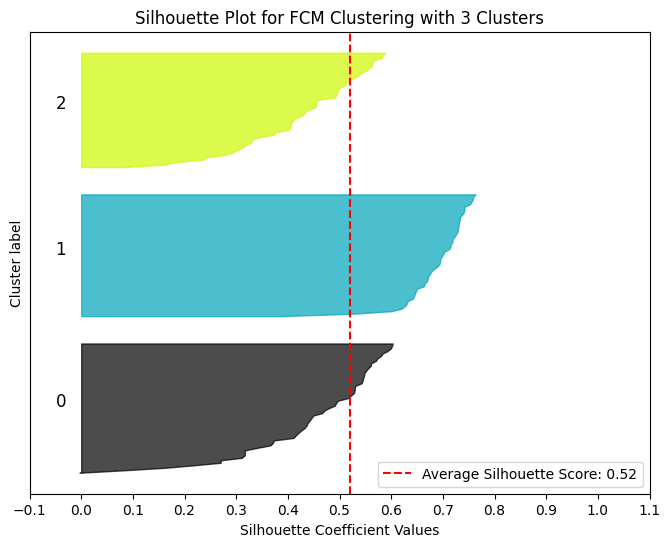

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Asumsikan Anda sudah memiliki variabel X_scaled_iris (data yang sudah dinormalisasi)
# dan predicted_labels_iris (label hasil clustering FCM, hard assignment)
# serta n_clusters_iris (jumlah cluster yang digunakan)

# Pastikan data dan label ada dan memiliki panjang yang sama
if len(X_scaled_iris) == 0 or len(predicted_labels_iris) == 0 or len(X_scaled_iris) != len(predicted_labels_iris):
    print("Data atau label prediksi kosong, atau panjangnya tidak sesuai. Tidak dapat membuat silhouette plot.")
else:
    # Hitung Silhouette Score untuk keseluruhan clustering
    silhouette_avg = silhouette_score(X_scaled_iris, predicted_labels_iris)
    print(f"Overall Silhouette Score untuk {n_clusters_iris} cluster (hasil FCM): {silhouette_avg:.4f}")

    # Hitung Silhouette Coefficient untuk setiap sampel
    sample_silhouette_values = silhouette_samples(X_scaled_iris, predicted_labels_iris)

    # Buat Silhouette Plot
    fig, ax1 = plt.subplots(figsize=(8, 6))

    y_lower = 10
    for i in range(n_clusters_iris):
        # Agregat silhouette scores untuk sampel yang termasuk dalam cluster i, dan urutkan
        ith_cluster_silhouette_values = sample_silhouette_values[predicted_labels_iris == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters_iris)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=12)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title(f"Silhouette Plot for FCM Clustering with {n_clusters_iris} Clusters")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Average Silhouette Score: {silhouette_avg:.2f}')
    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.1)) # Set x-ticks from -0.1 to 1.0

    plt.legend()
    plt.show()

Nilai Silhouette Score memberikan gambaran tentang seberapa baik setiap titik data cocok dengan klaster-nya sendiri dibandingkan dengan klaster tetangganya. Skor ini berkisar antara -1 hingga 1.

Nilai mendekati 1 berarti titik data sangat cocok dengan klaster-nya sendiri dan jauh dari klaster lain (pengelompokan sangat baik). 👍
Nilai mendekati 0 berarti titik data berada sangat dekat dengan batas antara dua klaster, dan mungkin bisa masuk ke klaster lain (pengelompokan tumpang tindih atau kurang jelas). ⚠️
Nilai mendekati -1 berarti titik data kemungkinan besar salah diklasifikasikan ke klaster yang salah (pengelompokan sangat buruk). 👎
Dengan Overall Silhouette Score sebesar 0.5204 untuk 3 klaster:

Ini menunjukkan bahwa hasil clustering FCM Anda memiliki kualitas wajar (karena skor berada antara 0.5 dan 0.7). ✨
Mayoritas titik data cukup cocok dengan klaster tempat mereka ditugaskan dan ada pemisahan yang reasonable antar klaster.
Namun, karena skor tidak mendekati 1, mungkin ada beberapa titik data yang berada di dekat batas klaster atau tumpang tindih, yang bisa dilihat lebih detail pada silhouette plot per klaster.
Kesimpulan:

Skor 0.5204 mengindikasikan bahwa dengan 3 klaster, FCM berhasil membuat pengelompokan yang cukup baik dan dapat diterima. Data Iris memang dikenal cukup terpisah menjadi 3 kelompok, dan skor ini mencerminkan kemampuan algoritma FCM dalam menemukan struktur tersebut meskipun tidak sesempurna jika skor mendekati 1.